<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

# 과제: 고객 신용도 예측


<img src = "https://github.com/Jangrae/img/blob/master/credit-card.jpg?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 코드 셀에는 주석을 충분히 답니다.
- 마크다운 셀을 사용해 작업 한 내용을 충분히 설명합니다.
- 입력을 요구한 (의견) 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 다양한 방법으로 데이터를 탐색하고 결과를 정리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.
- 더 나은 성능을 보이도록 특정 모델을 튜닝합니다.

**3) 데이터 정보**

<img src = "https://github.com/Jangrae/img/blob/master/credit.png?raw=true" width=550 align="left"/>

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [766]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [767]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/credit_NA.csv'
path = 'https://bit.ly/CreditFile'
data = pd.read_csv(path)

# 2.데이터 이해

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

## 2.1.기본 정보 확인

- 데이터에 대한 기본 정보를 우선 확인합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [768]:
# 상위 데이터 확인
data.head()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28.0,2,1,3,1,1
1,1,2,9,2,0,276,3,4,4,1,22.0,1,1,2,1,1
2,1,1,18,4,2,1049,2,2,4,2,21.0,1,1,3,1,1
3,1,1,24,4,1,6419,5,2,4,4,NaN,3,2,4,2,1
4,1,3,12,2,2,1424,5,2,4,1,55.0,2,1,4,2,1


In [769]:
# 하위 데이터 확인
data.tail()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
995,1,1,12,2,3,1680,5,4,1,1,35.0,2,1,3,1,1
996,1,1,42,2,2,7882,4,3,4,2,45.0,3,1,3,1,1
997,0,2,54,0,9,15945,2,3,4,4,58.0,1,1,3,2,1
998,1,2,15,4,3,1537,5,3,4,1,50.0,2,2,3,2,1
999,0,3,12,2,0,1386,3,2,2,2,26.0,2,1,3,1,1


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [770]:
# 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Creditability   1000 non-null   int64  
 1   AccountBalance  1000 non-null   int64  
 2   CreditDuration  1000 non-null   int64  
 3   Payment         1000 non-null   int64  
 4   Purpose         1000 non-null   int64  
 5   CreditAmount    1000 non-null   int64  
 6   Employment      1000 non-null   int64  
 7   SexMarital      1000 non-null   int64  
 8   CurrentAddress  1000 non-null   int64  
 9   MostValuable    1000 non-null   int64  
 10  Age             983 non-null    float64
 11  ApartmentType   1000 non-null   int64  
 12  NoCredits       1000 non-null   int64  
 13  Occupation      1000 non-null   int64  
 14  Telephone       1000 non-null   int64  
 15  ForeignWorker   1000 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 125.1 KB


**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [771]:
# 기초 통계 정보
data.describe()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,983.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.54500,2.828000,3271.24800,3.384000,2.68200,2.845000,2.358000,35.495422,1.928000,1.407000,2.904000,1.404000,1.037000
std,0.458487,0.835589,12.058814,1.08312,2.744439,2822.75176,1.208306,0.70808,1.103718,1.050209,11.302980,0.530186,0.577654,0.653614,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,3.000000,2.00000,2.000000,1.000000,27.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,3.000000,3.00000,3.000000,2.000000,33.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,4.00000,3.000000,3972.25000,5.000000,3.00000,4.000000,3.000000,42.000000,2.000000,2.000000,3.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,4.00000,4.000000,4.000000,75.000000,3.000000,4.000000,4.000000,2.000000,2.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [772]:
# 결측치 확인
data.isna().sum()

Creditability      0
AccountBalance     0
CreditDuration     0
Payment            0
Purpose            0
CreditAmount       0
Employment         0
SexMarital         0
CurrentAddress     0
MostValuable       0
Age               17
ApartmentType      0
NoCredits          0
Occupation         0
Telephone          0
ForeignWorker      0
dtype: int64

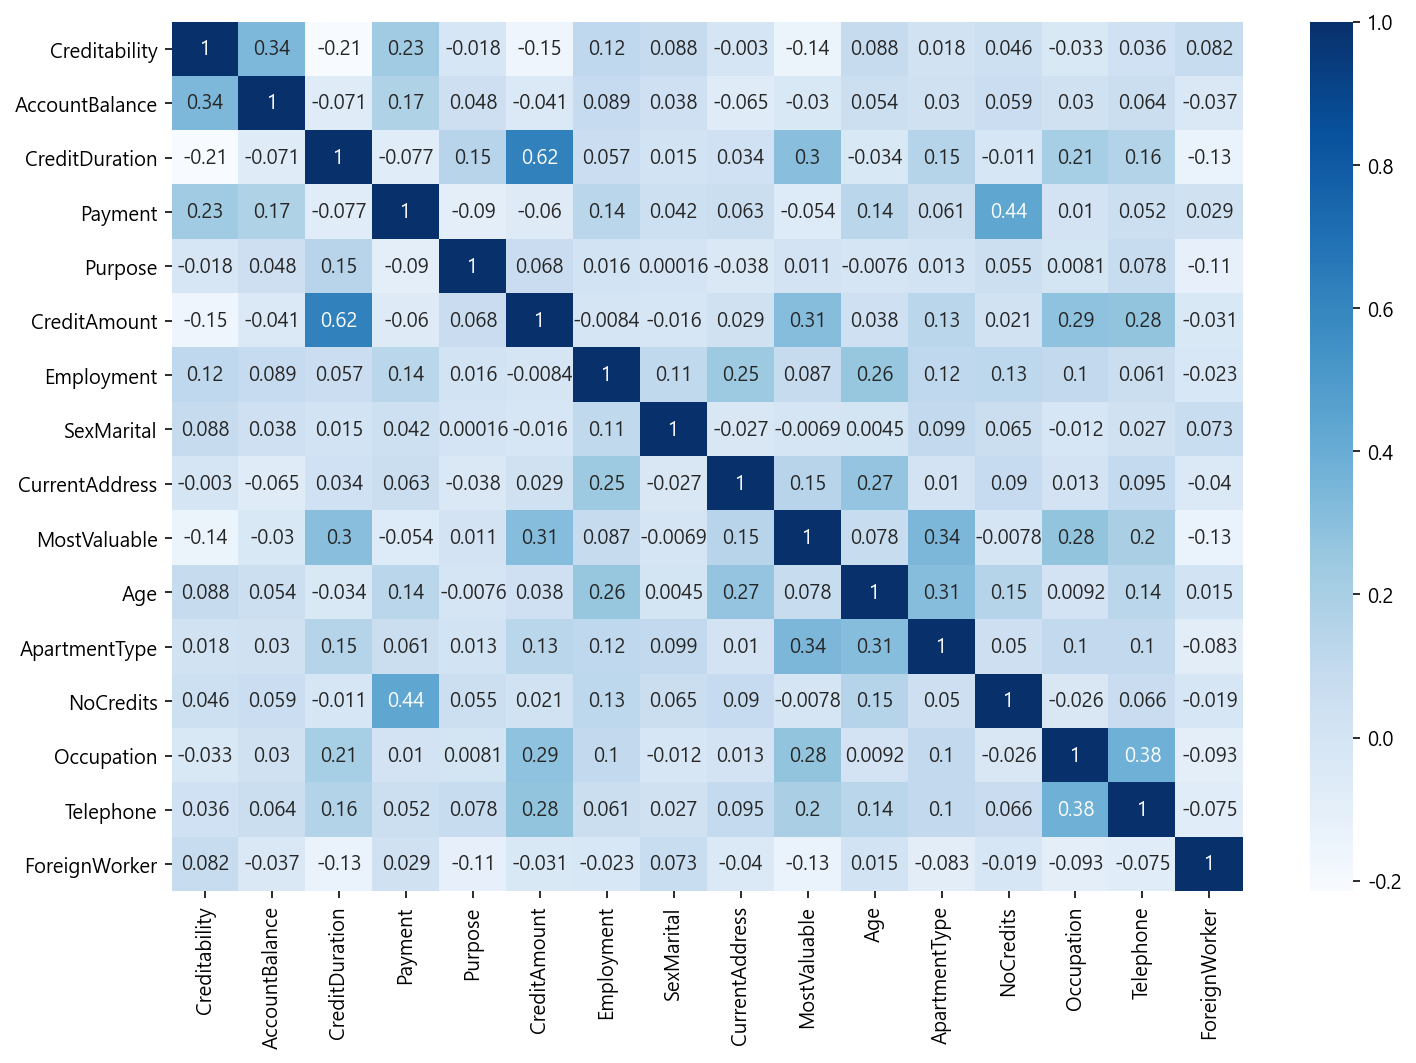

In [773]:
# 상관분석
data.corr()
# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot = True, cmap = 'Blues')  
plt.show()

## 2.2.데이터 상세 확인(5가지 이상 추가)

- 데이터를 **충분히 이해할 수 있도록** 집계와 시각화를 통해 살펴봅니다.
- 이후 모델링을 진행해야 하니 분석에 너무 많은 시간을 할애해서는 안됩니다.
- 분석 결과를 관련 코드 셀 아래에 정리합니다.

**1) Target 값 분포 확인**

- Target 변수인 Creditability 변수의 값 분포를 확인합니다.

1    700
0    300
Name: Creditability, dtype: int64
1    0.7
0    0.3
Name: Creditability, dtype: float64


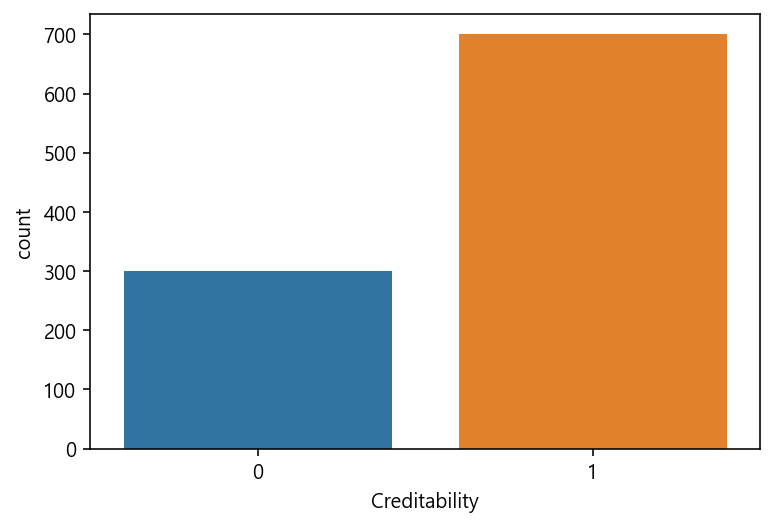

In [774]:
# target변수인 Creditability확인
target = 'Creditability'
print(data[target].value_counts())
print(data[target].value_counts()/ len(data[target]))
sns.countplot(data['Creditability'])
plt.show()

- (의견) 신용도가 좋아서 대출 가능한 사람이 700명으로 당연히 훨씬 많다. 적으면 은행 유지가 안되기 때문이다.
- (의견) 신용도가 안좋아서 대출이 불가능한 고객들은 어떤 이유가 있을까?

**2) 변수 구분**

- Target 변수(Creditability)를 제외한 변수를 범주형과 연속형으로 구분해 목륵을 정리합니다.
- 목록 개수는 필요한 만큼 늘려 사용합니다.

- 범주형 변수 (가변수화 대상)
    -  AccountBalance
    -  Payment	
    -  Purpose	 
    -  Employment	 
    -  SexMarital	 
    -  CurrentAddress	
    -  MostValuable	
    -  ApartmentType	
    -  NoCredits	
    -  Occupation	
    -  Telephone
    -  ForeignWorker
- 연속형 변수 (정규화 대상)
    - Age	 
    - CreditDuration 
    - CreditAmount		 

**3) 범주형 변수 확인**

- Target 변수(Creditability)를 제외한 범주형 변수의 범주값과 그 값의 개수를 확인합니다.
- 참고: 대상 변수를 리스트로 선언하고 반복문을 수행해 확인하면 편리합니다.

In [775]:
print('[[[[[은행잔고, 과거대출납입상태 변수값 개수]]]]]')
print(data['AccountBalance'].value_counts())
print('--------------------------')
print(data['Payment'].value_counts())

print('[[[[[현직업 근무기간, 성별 결혼상태 변수값 개수]]]]]')
print(data['Employment'].value_counts())
print('--------------------------')
print(data['SexMarital'].value_counts())

print('[[[[[가장 가치있는 자산, 주거 환경 변수값 개수]]]]]')
print(data['MostValuable'].value_counts())
print('--------------------------')
print(data['ApartmentType'].value_counts())

print('[[[[[총 대출건수, 직업 변수값 개수]]]]]')
print(data['NoCredits'].value_counts())
print('--------------------------')
print(data['Occupation'].value_counts())

print('[[[[[전화기 소유 여부, 외국인 근로자 여부 변수값 개수]]]]]')
print(data['Telephone'].value_counts())
print('--------------------------')
print(data['ForeignWorker'].value_counts())

print('[[[[[대출목적, 현거주지 거주기간 변수값 개수]]]]]')
print(data['Purpose'].value_counts())
print('--------------------------')
print(data['CurrentAddress'].value_counts())

[[[[[은행잔고, 과거대출납입상태 변수값 개수]]]]]
3    457
1    274
2    269
Name: AccountBalance, dtype: int64
--------------------------
2    530
4    293
3     88
1     49
0     40
Name: Payment, dtype: int64
[[[[[현직업 근무기간, 성별 결혼상태 변수값 개수]]]]]
3    339
5    253
4    174
2    172
1     62
Name: Employment, dtype: int64
--------------------------
3    548
2    310
4     92
1     50
Name: SexMarital, dtype: int64
[[[[[가장 가치있는 자산, 주거 환경 변수값 개수]]]]]
3    332
1    282
2    232
4    154
Name: MostValuable, dtype: int64
--------------------------
2    714
1    179
3    107
Name: ApartmentType, dtype: int64
[[[[[총 대출건수, 직업 변수값 개수]]]]]
1    633
2    333
3     28
4      6
Name: NoCredits, dtype: int64
--------------------------
3    630
2    200
4    148
1     22
Name: Occupation, dtype: int64
[[[[[전화기 소유 여부, 외국인 근로자 여부 변수값 개수]]]]]
1    596
2    404
Name: Telephone, dtype: int64
--------------------------
1    963
2     37
Name: ForeignWorker, dtype: int64
[[[[[대출목적, 현거주지 거주기간 변수값 개수]]]]]
3     280
0     234
2 

- (의견) 다양한 변수들이 있지만, 나는 여기서 AccountBalance, Age, ApartmentType, CreditAmount, ForeignWorker 등을 집중적으로 보겠다.
- (의견) 전화기 소유 여부와는 전혀 관계가 없을 것 같다.

**4) 은행자산 현황과 신용도 분석**  

- 내용 : 1(no account) 2(no balance) 3(some balance)

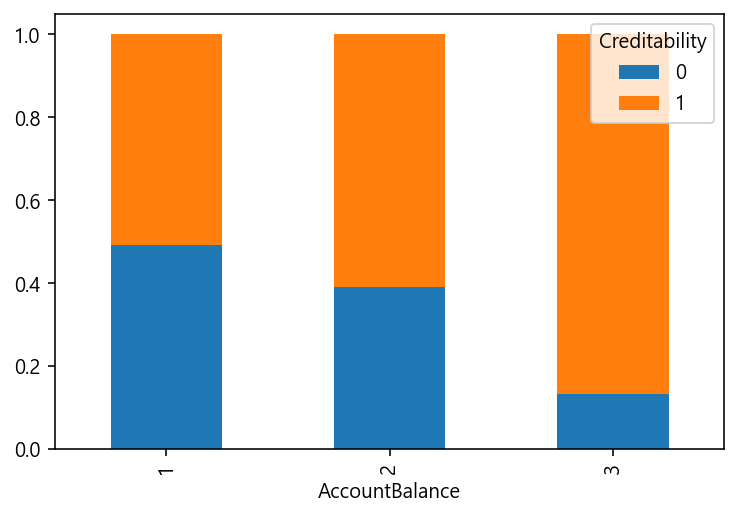

In [776]:
# Creditability --> AccountBalance 값 분포
temp = pd.crosstab(data['AccountBalance'], data[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.show()

- (의견) 3(some balance) 어느 정도 균형 잡힌 자산 고객들일수록 신용도가 높은 것으로 나온다.
- (의견) 3인데도 불구하고 대출이 불가한 고객들은 고액채무자 인것으로 보이는데, 은행에 실적을 높이기 위해서는 이들의 돈을 돌려받는게 중요하다.

**5) 나이에 따른 신용도**

- 내용 : 숫자형

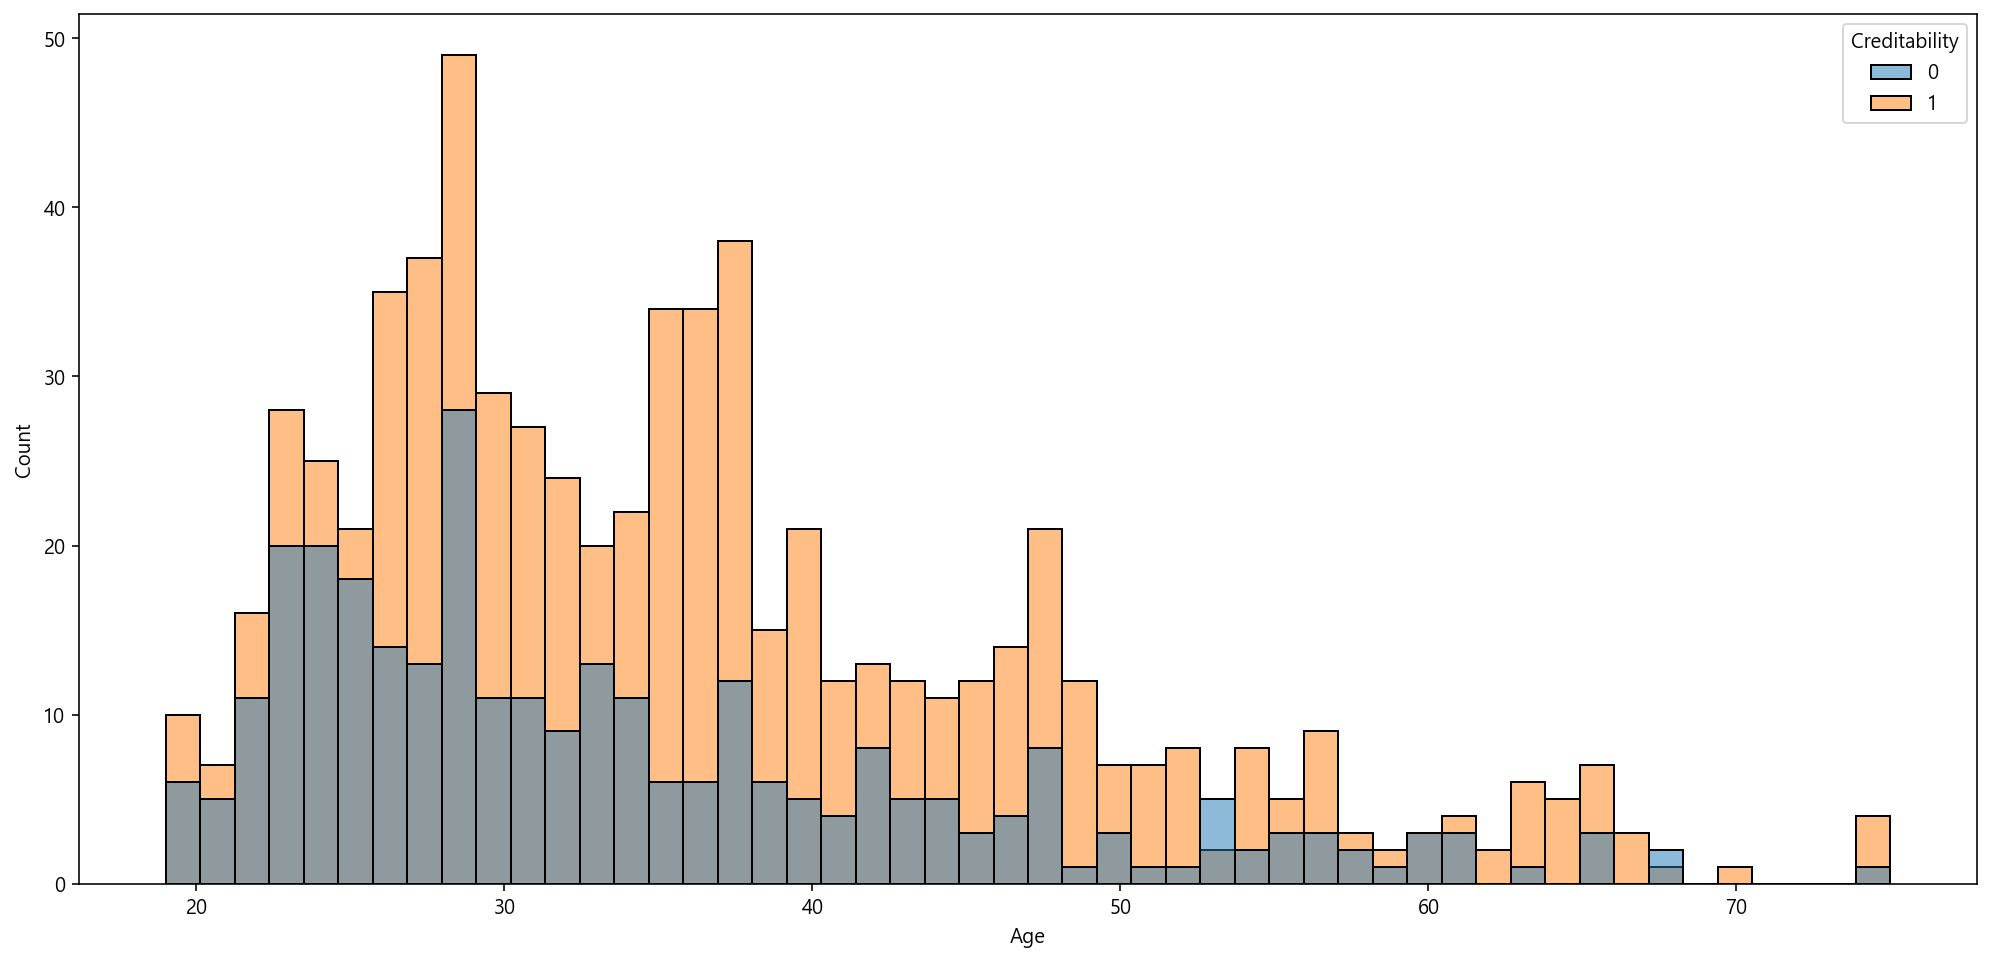

In [777]:
# Age --> Creditability 값 분포
plt.figure(figsize=(17,8))
sns.histplot(x=data['Age'], hue=data['Creditability'], bins=50)
plt.show()

- (의견) 대체로 20대 중후반에서 40대 중반전까지 대출이 많이 가능한 것으로 보인다. 이들은 창업, 결혼, 내집장만등 을 위해 막 대출을 시작하는 나이라 신용도가 대체로 좋은 것 같다.
- (의견) 교차되는 지점은 50대 중반에 있는데 눈여겨 봐야될 것 같다.
- (의견) 20대 후반의 대출불가 신용도가 가장 높은데 이들은 이미 창업, 결혼, 내집장만, 전세대출 등을 이미 대출받은 경험이 있기 때문에 신용도가 크게 하락된 것 같다. Age변수와 CreditDuration, NoCredits등을 살펴보면 좋을 것 같다.

**6) 주거 환경**

- 내용 1(free apartment) 2(rented) 3(owned)

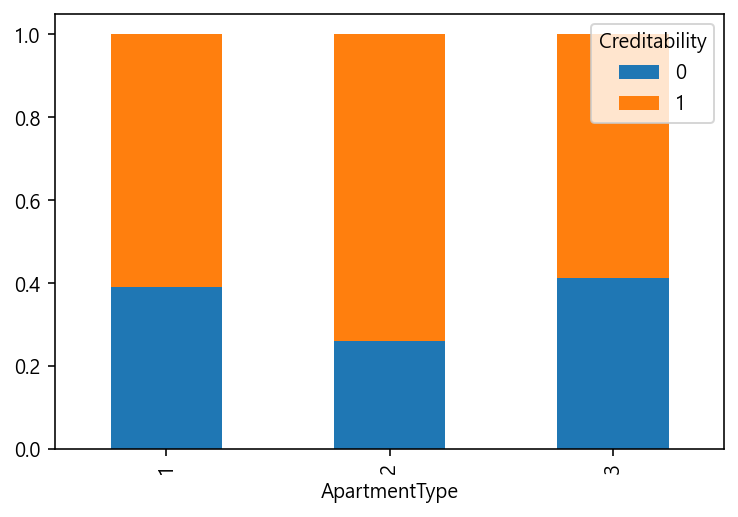

In [778]:
# Creditability --> ApartmentType 값 분포
temp = pd.crosstab(data['ApartmentType'], data[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.show()

- (의견) 2(rented)에 신용도가 가장 높고, 3(owned)의 대출불가 신용도가 가장 높게 나오는 것으로 보인다.
- (의견) 이들은 아마 내 집 장만을 하기 위해 무리하게 대출을 하여 현재로서는 신용도가 하락된것으로 보인다.

**7) 신청한 대출금액**

- 내용 : 숫자형

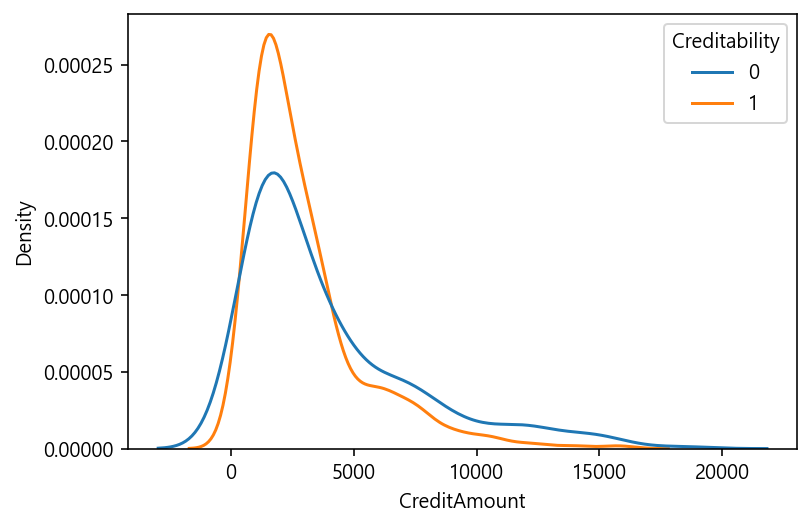

In [779]:
# Creditability --> CreditAmount 값 분포
sns.kdeplot(x=data['CreditAmount'], data=data, hue= target, common_norm=False)
plt.show()

- (의견) 신청한 대출금액이 클수록 신용도가 하락하는 것을 보여준다.

**8) 가장 가치있는 자산**

- 내용 1(none) 2(car) 3(life insurance) 4(real estate)

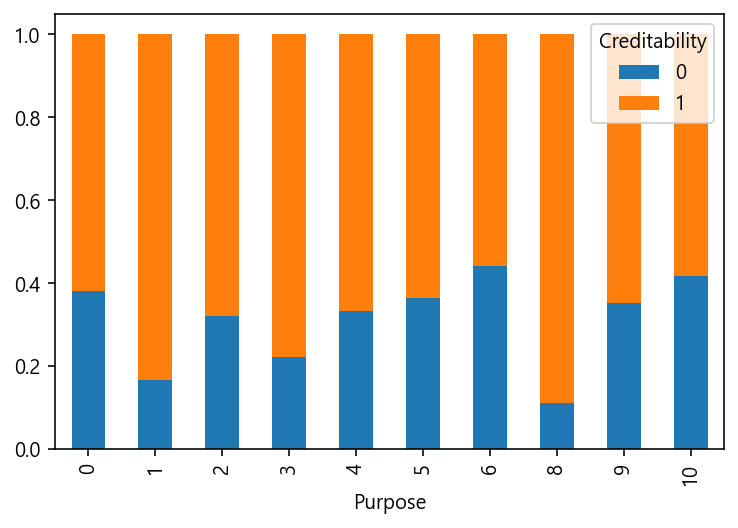

In [780]:
# Creditability --> MostValuable 값 분포
temp = pd.crosstab(data['Purpose'], data[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.show()

- (의견) 의외로 4(real estate)의 대출불가 신용도가 가장 높은 것으로 나왔다
- (의견) 이들은 아마 부동산을 담보로 잡아 이미 대출을 받아서 신용도가 크게 하락 된것 같다.
- (의견) 자산과 대출건수를 비교하여야 겠다.

**9) 외국인 근로자 여부**

- 내용 1(no) 2(yes)

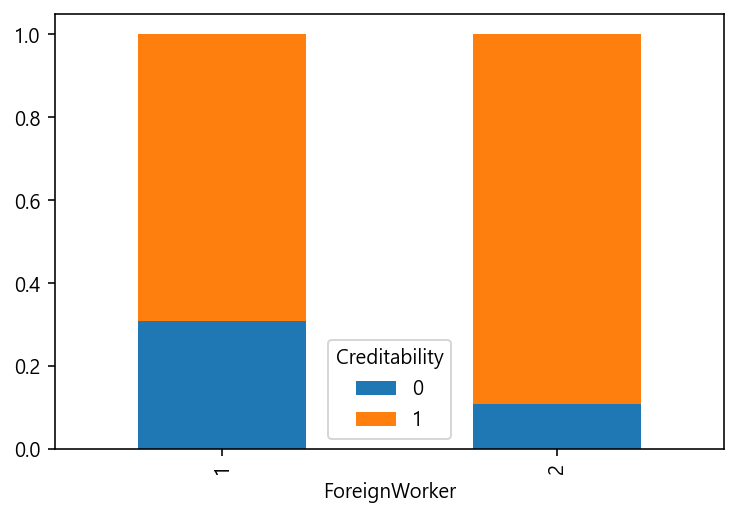

In [703]:
# Creditability --> ForeignWorker 값 분포
temp = pd.crosstab(data['ForeignWorker'], data[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.show()

- (의견) 이것은 의외였다... 나의 편견의 반성하지만 당연히 외국인 근로자면은 대출이 힘들 것이라 생각했다.
- (의견) 우리나라가 외국인 근로자들의 대한 정책이 잘 마련되어있는건지 찾아봐야겠다.

**9) 외국인 근로자 여부**

- 내용 1(미취업) 2(1년 미만) 3(1~4년) 4(4~7년) 5(7년이상)

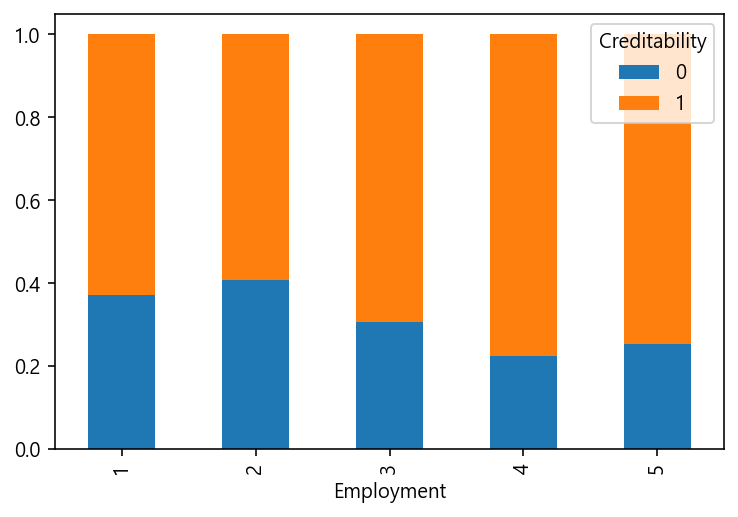

In [704]:
# Creditability --> Employment 값 분포
temp = pd.crosstab(data['Employment'], data[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.show()

- (의견) 확실히 연차가 쌓일수록 신용도가 높아지는 것을 볼 수 있다.
- (의견) 미취업과 1년 미만은 학자금대출 등 때문에 신용도가 낮은 걸까?

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- Age 변수에 대한 결측치 처리를 진행합니다.
- 데이터 양이 많지 않으니 제거 보다는 채우기를 권고합니다.

In [705]:
# 결측치 채우기, 선형 보간법으로 채우기
data.interpolate(method='linear', inplace=True) 

# 확인
data.isnull().sum()

Creditability     0
AccountBalance    0
CreditDuration    0
Payment           0
Purpose           0
CreditAmount      0
Employment        0
SexMarital        0
CurrentAddress    0
MostValuable      0
Age               0
ApartmentType     0
NoCredits         0
Occupation        0
Telephone         0
ForeignWorker     0
dtype: int64

**2) x, y 분리**

- Target을 선정하고 x, y를 분리합니다.

In [706]:
# target 확인
target = 'Creditability'

# 데이터 분리
x = data.drop(target, axis = 1)
y = data[target]

**3) 가변수화**

- 앞에서 범주형으로 구분한 변수에 대해 가변수화를 수행합니다.
- 참고: 이미 x, y로 분리가 되었으니 x에 대한 가변수화를 수행해야 합니다.


In [707]:
# 가변수화
cols=['AccountBalance', 'Payment', 'Purpose', 'Employment', 'SexMarital', 
      'CurrentAddress', 'MostValuable', 'ApartmentType', 'NoCredits', 
      'Occupation', 'Telephone', 'ForeignWorker']
x = pd.get_dummies(x, columns=cols, drop_first=True)

# 확인
x.head()

,CreditDuration,CreditAmount,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Payment_4,Purpose_1,...,ApartmentType_2,ApartmentType_3,NoCredits_2,NoCredits_3,NoCredits_4,Occupation_2,Occupation_3,Occupation_4,Telephone_2,ForeignWorker_2
0,24,1249,28.0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,9,276,22.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,18,1049,21.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,24,6419,38.0,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,1,1,0
4,12,1424,55.0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


**4) 정규화**

- 앞에서 연속형으로 구분한 변수에 대해 정규화를 진행합니다.

In [708]:
# 정규화
cols=['Age', 'CreditDuration', 'CreditAmount']


# 확인
x[cols] = (x[cols] - x[cols].min()) / (x[cols].max() - x[cols].min())
x.head()

,CreditDuration,CreditAmount,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Payment_4,Purpose_1,...,ApartmentType_2,ApartmentType_3,NoCredits_2,NoCredits_3,NoCredits_4,Occupation_2,Occupation_3,Occupation_4,Telephone_2,ForeignWorker_2
0,0.294118,0.054969,0.160714,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.073529,0.001431,0.053571,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.205882,0.043964,0.035714,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.294118,0.339441,0.339286,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,1,1,0
4,0.117647,0.064598,0.642857,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


**5) 학습용, 평가용 데이터 분리**


- 모델링을 위해 학습용, 평가용 데이터를 분리합니다.

In [709]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 다음 알고리즘을 사용해 모델링을 진행합니다.
    - Logistic Regression
    - KNN
    - Decision Tree
    - Random Forest
    - XGBoost
- Classification Report를 사용해 성능을 평가합니다.
- 성능 평가 결과 아래에 성능에 대한 의견을 정리합니다.
- 혼동행렬, 변수 중요도 등을 시각화해 모델을 심도있게 탐색합니다.

## 4.1.Logistic Regression

### 4.1.1.모델링

- Logistic Regression 알고리즘을 사용해 모델링을 진행합니다.

In [710]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [711]:
# 2단계: 선언하기
model = LogisticRegression(max_iter=500)

In [712]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [713]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [714]:
# 5단계: 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 50  47]
 [ 31 172]]
              precision    recall  f1-score   support

           0       0.62      0.52      0.56        97
           1       0.79      0.85      0.82       203

    accuracy                           0.74       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.73      0.74      0.73       300



- (의견) 대출불가 신용도의 recall과 precision이 현저히 낮은 수준이다.
- (의견) 정확도도 74%로 낮게 나왔다.
- (의견) 대출불가 신용도의 표본이 낮아서 나오는 결과물인거 같다. 오버샘플링을 해야되는 것인가??

In [715]:
# 성능 정보 수집
from sklearn.metrics import precision_score, recall_score, accuracy_score

score={}
score['LogisticReg'] = [precision_score(y_test, y_pred),
                        recall_score(y_test, y_pred),
                        accuracy_score(y_test, y_pred)]

### 4.1.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 시각화와 K분할**

- 내용

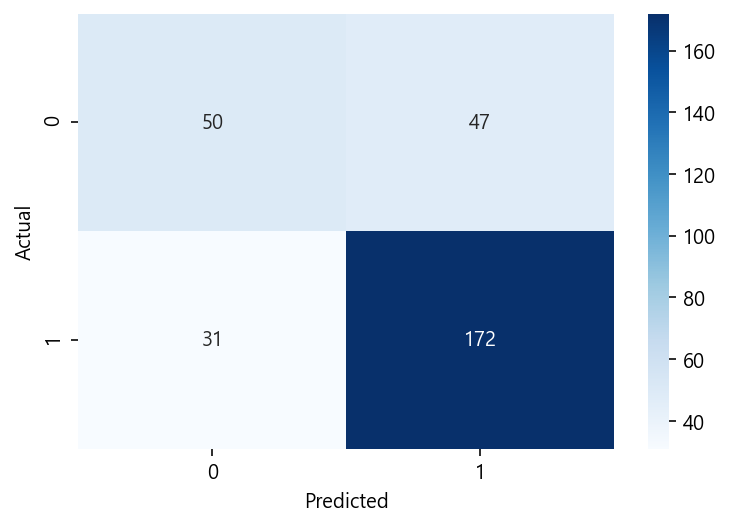

In [716]:
import seaborn as sns
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='.0f',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [717]:
# 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 선언하기 
model = LogisticRegression(max_iter=500)

# 학습, 예측, 평가하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print(cv_score)
print(cv_score.mean())
print(cv_score.std())

[0.72857143 0.72857143 0.74285714 0.72857143 0.78571429 0.68571429
 0.71428571 0.75714286 0.74285714 0.78571429]
0.74
0.029137254363387335


- (의견) 실제 1인값이 너무 많아서 재현율과 정밀도가 낮다.

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘을 사용해 모델링을 진행합니다.

In [718]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [719]:
# 2단계: 선언하기
model = DecisionTreeClassifier(max_depth= 5,random_state=2022) # 트리를 만들기위해 max_depth=5로줌

In [720]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2022)

In [721]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [722]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 47  50]
 [ 35 168]]
              precision    recall  f1-score   support

           0       0.57      0.48      0.53        97
           1       0.77      0.83      0.80       203

    accuracy                           0.72       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.71      0.72      0.71       300



- (의견) 정확도가 0.72로 나왔다.
- (의견) DecisionTree또한 대출불가의 재현율과 정밀도가 너무 낮게 나왔다.
- (의견) 이직여부의 데이터에서 재현율과 정밀도가 낮을 경우 정확도는 높게 나왔는데, 뭐가 다른지 생각해보자

In [723]:
# 성능 정보 수집
score['DecisionTree'] = [precision_score(y_test, y_pred),
                        recall_score(y_test, y_pred),
                        accuracy_score(y_test, y_pred)]

### 4.2.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1)** 중요도 확인 및 시각화

- 내용

In [724]:
# 중요도 확인
print(list(x))
model.feature_importances_


['CreditDuration', 'CreditAmount', 'Age', 'AccountBalance_2', 'AccountBalance_3', 'Payment_1', 'Payment_2', 'Payment_3', 'Payment_4', 'Purpose_1', 'Purpose_2', 'Purpose_3', 'Purpose_4', 'Purpose_5', 'Purpose_6', 'Purpose_8', 'Purpose_9', 'Purpose_10', 'Employment_2', 'Employment_3', 'Employment_4', 'Employment_5', 'SexMarital_2', 'SexMarital_3', 'SexMarital_4', 'CurrentAddress_2', 'CurrentAddress_3', 'CurrentAddress_4', 'MostValuable_2', 'MostValuable_3', 'MostValuable_4', 'ApartmentType_2', 'ApartmentType_3', 'NoCredits_2', 'NoCredits_3', 'NoCredits_4', 'Occupation_2', 'Occupation_3', 'Occupation_4', 'Telephone_2', 'ForeignWorker_2']


array([0.15608134, 0.15731071, 0.08884644, 0.01787891, 0.33394214,
       0.06135893, 0.        , 0.        , 0.02502978, 0.03944612,
       0.        , 0.01805875, 0.        , 0.        , 0.        ,
       0.        , 0.04024521, 0.        , 0.03742235, 0.        ,
       0.        , 0.        , 0.01083525, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01354406,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

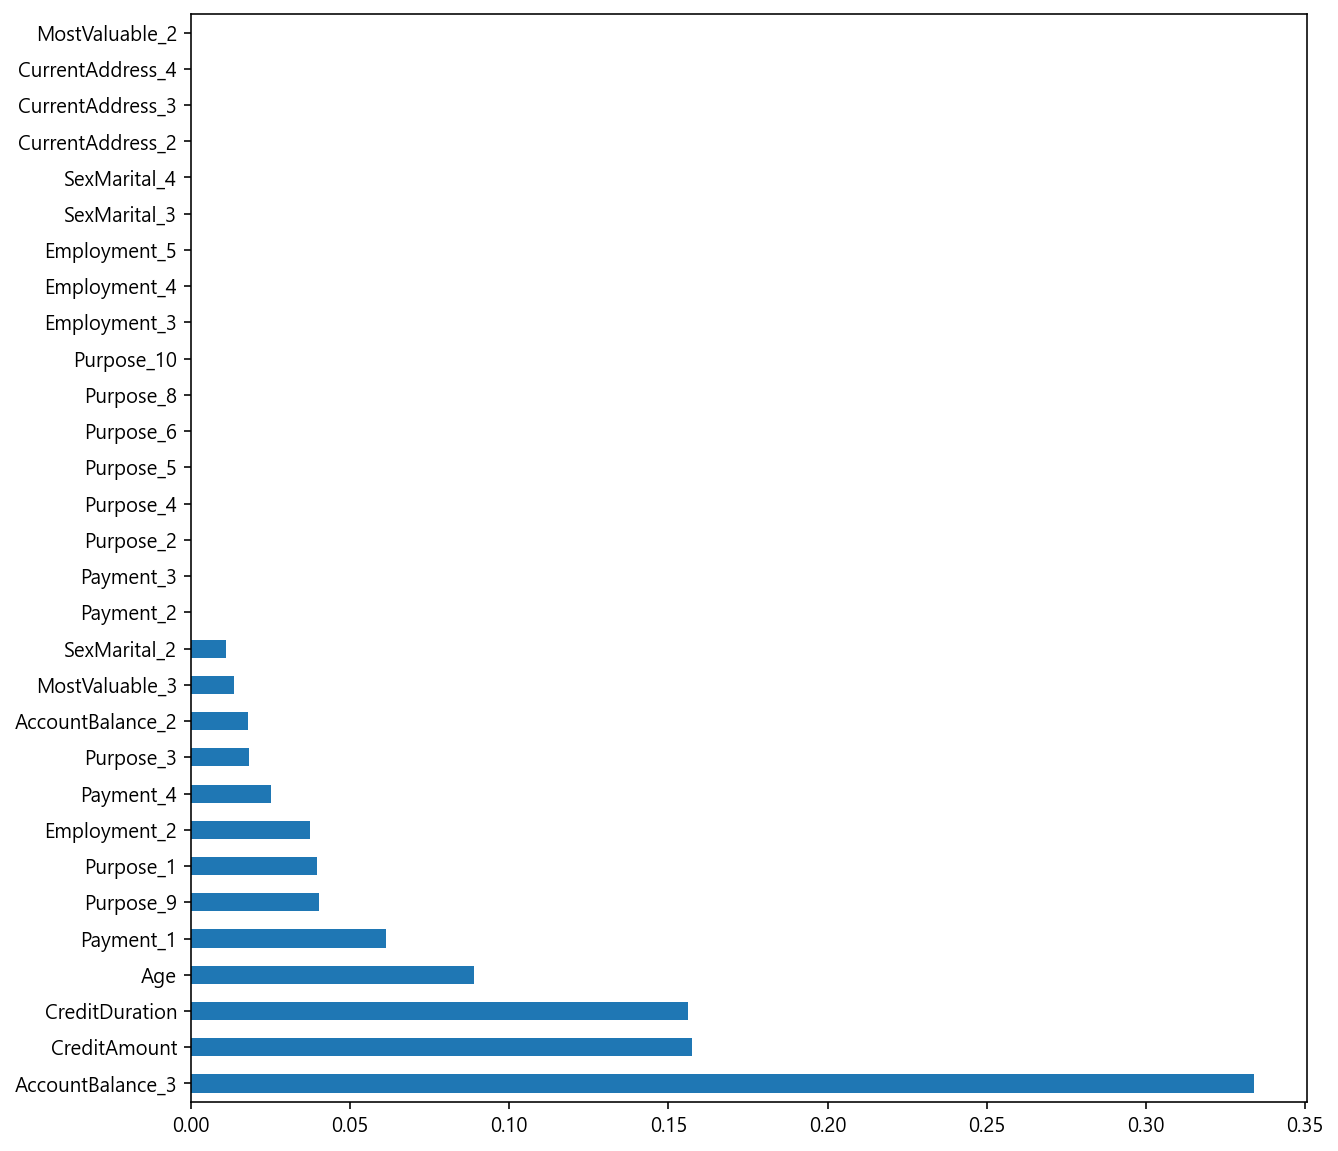

In [725]:
# 중요도 시각화
f_importance = model.feature_importances_ 
f_importance = pd.Series(f_importance, index=x.columns) 
plt.figure(figsize= (5, 8)) 
f_importance = f_importance.nlargest(30) 
f_importance.plot(kind='barh', figsize = (10, 10)) 
plt.rcParams['font.family'] ='Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] =False 
plt.show() 

AccountBalance_3    0.333942
CreditAmount        0.157311
CreditDuration      0.156081
Age                 0.088846
Payment_1           0.061359
dtype: float64


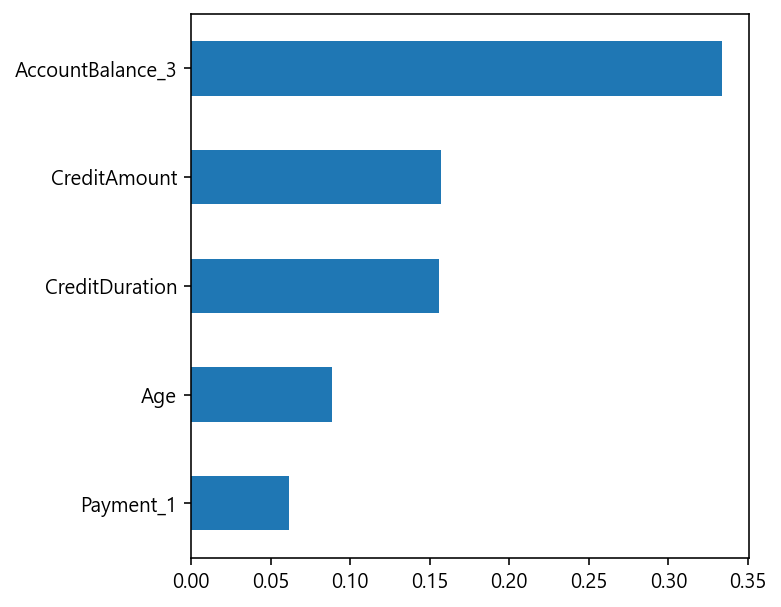

In [726]:
# 중요도 top 5
f_importance = model.feature_importances_
f_importance = pd.Series(f_importance, index=x.columns)
plt.figure(figsize= (5, 8))
f_importance = f_importance.nlargest(5)
print(f_importance)
f_importance.plot(kind='barh', figsize = (5, 5))
plt.gca().invert_yaxis()
plt.show()

- (의견) AccountBalance_3(균형있는 자산)이 신용도에서 가장 중요성이 높은 것으로 나왔다.
- (의견) most_value2(car)가 가장 중요도가 떨어지는 것으로 나왔는데, 차는 의미 없는것으로 보인다.

**2)** tree만들기

- 내용

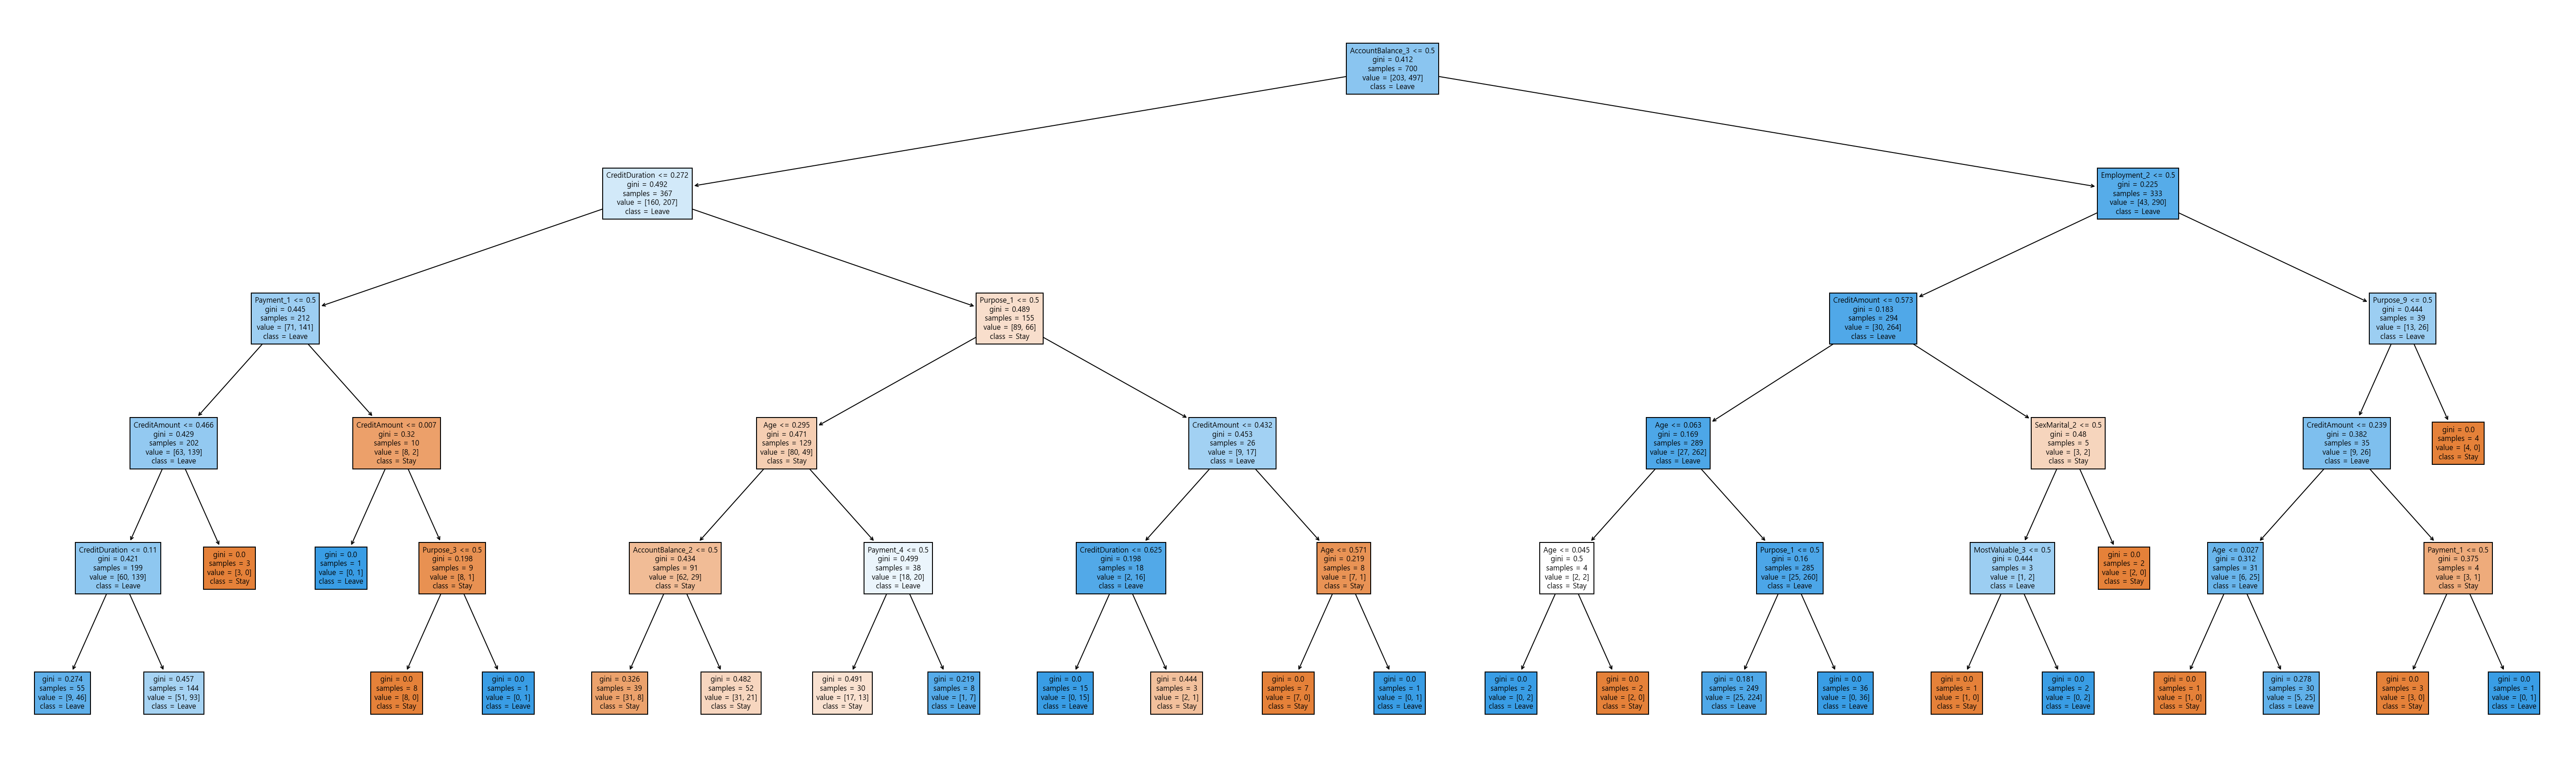

In [727]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 15))
plot_tree(model, filled=True, class_names=['Stay', 'Leave'], feature_names=list(x), fontsize=8)
plt.show()

- (의견) 바탕화면으로 드래그한 결과 아주 이쁜 트리가 나왔다. 가장 꼭대기에는 AccountBalance_3(균형있는 자산)이 있었고, 그 밑으로 CreditDuration, Employment_2(현직업근무기간 1년미만)의 변수들이 있었다.

## 4.3.KNN

### 4.3.1.모델링

- KNN 알고리즘을 사용해 모델링을 진행합니다.

In [728]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [729]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [730]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [731]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [732]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 32  65]
 [ 30 173]]
              precision    recall  f1-score   support

           0       0.52      0.33      0.40        97
           1       0.73      0.85      0.78       203

    accuracy                           0.68       300
   macro avg       0.62      0.59      0.59       300
weighted avg       0.66      0.68      0.66       300



- (의견) 정확도가 0.68로 낮게 나왔다.
- (의견) n_neighbors를 한번 추가해봐서 정확도를 높여야겠다.
- (의견) 얘 또한 재현율과 정밀도가 너무 낮은 것 같다.

In [733]:
# 성능 정보 수집
score['KNN'] = [precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                accuracy_score(y_test, y_pred)]

### 4.3.2.모델 탐색(1가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) n_neighbors를 한번 추가해보기**

- 내용

In [734]:
# 2단계: 선언하기
model = KNeighborsClassifier(n_neighbors=10)

# 3단계: 학습하기
model.fit(x_train, y_train)

# 4단계: 예측하기
y_pred = model.predict(x_test)

# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 34  63]
 [ 26 177]]
              precision    recall  f1-score   support

           0       0.57      0.35      0.43        97
           1       0.74      0.87      0.80       203

    accuracy                           0.70       300
   macro avg       0.65      0.61      0.62       300
weighted avg       0.68      0.70      0.68       300



- (의견) n_neighbors를 10으로 준 결과 2%나 상승했다.
- (의견) 밑에 K분할 해본결과 평균이 약 0.73이 나왔다.

In [735]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 선언하기 
model = KNeighborsClassifier(n_neighbors=5)

# 학습, 예측, 평가하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print(cv_score)
print('    평균:', cv_score.mean())
print('표준편차:', cv_score.std())

[0.71428571 0.78571429 0.64285714 0.78571429 0.74285714 0.67142857
 0.72857143 0.72857143 0.72857143 0.75714286]
    평균: 0.7285714285714285
표준편차: 0.042857142857142844


## 4.4.Random Forest

### 4.4.1.모델링

- Random Forest 알고리즘을 사용해 모델링을 진행합니다.

In [736]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier

In [737]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [738]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [739]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [740]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 42  55]
 [ 26 177]]
              precision    recall  f1-score   support

           0       0.62      0.43      0.51        97
           1       0.76      0.87      0.81       203

    accuracy                           0.73       300
   macro avg       0.69      0.65      0.66       300
weighted avg       0.72      0.73      0.72       300



- (의견) 역시 앙상블을 정확도가 다른 모델링에 비해 높게 나오는 것 같다.
- (의견) 밑에서 튜닝할때 max_depth를 추가하면 더 좋은 결과가 나올것으로 보인다.

In [741]:
# 성능 정보 수집
score['Random Forest'] = [precision_score(y_test, y_pred),
                        recall_score(y_test, y_pred),
                        accuracy_score(y_test, y_pred)]

### 4.4.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 혼동행렬 시각화**

- 내용

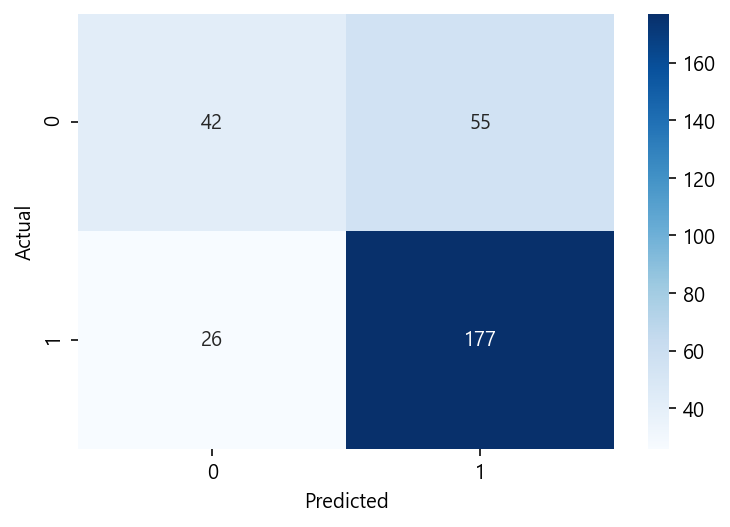

In [742]:
import seaborn as sns
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='.0f',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- (의견) 앞에서 나온 혼동행렬결과를 시각화해봤다.

**2) 중요도 확인 및 시각화**

- 내용

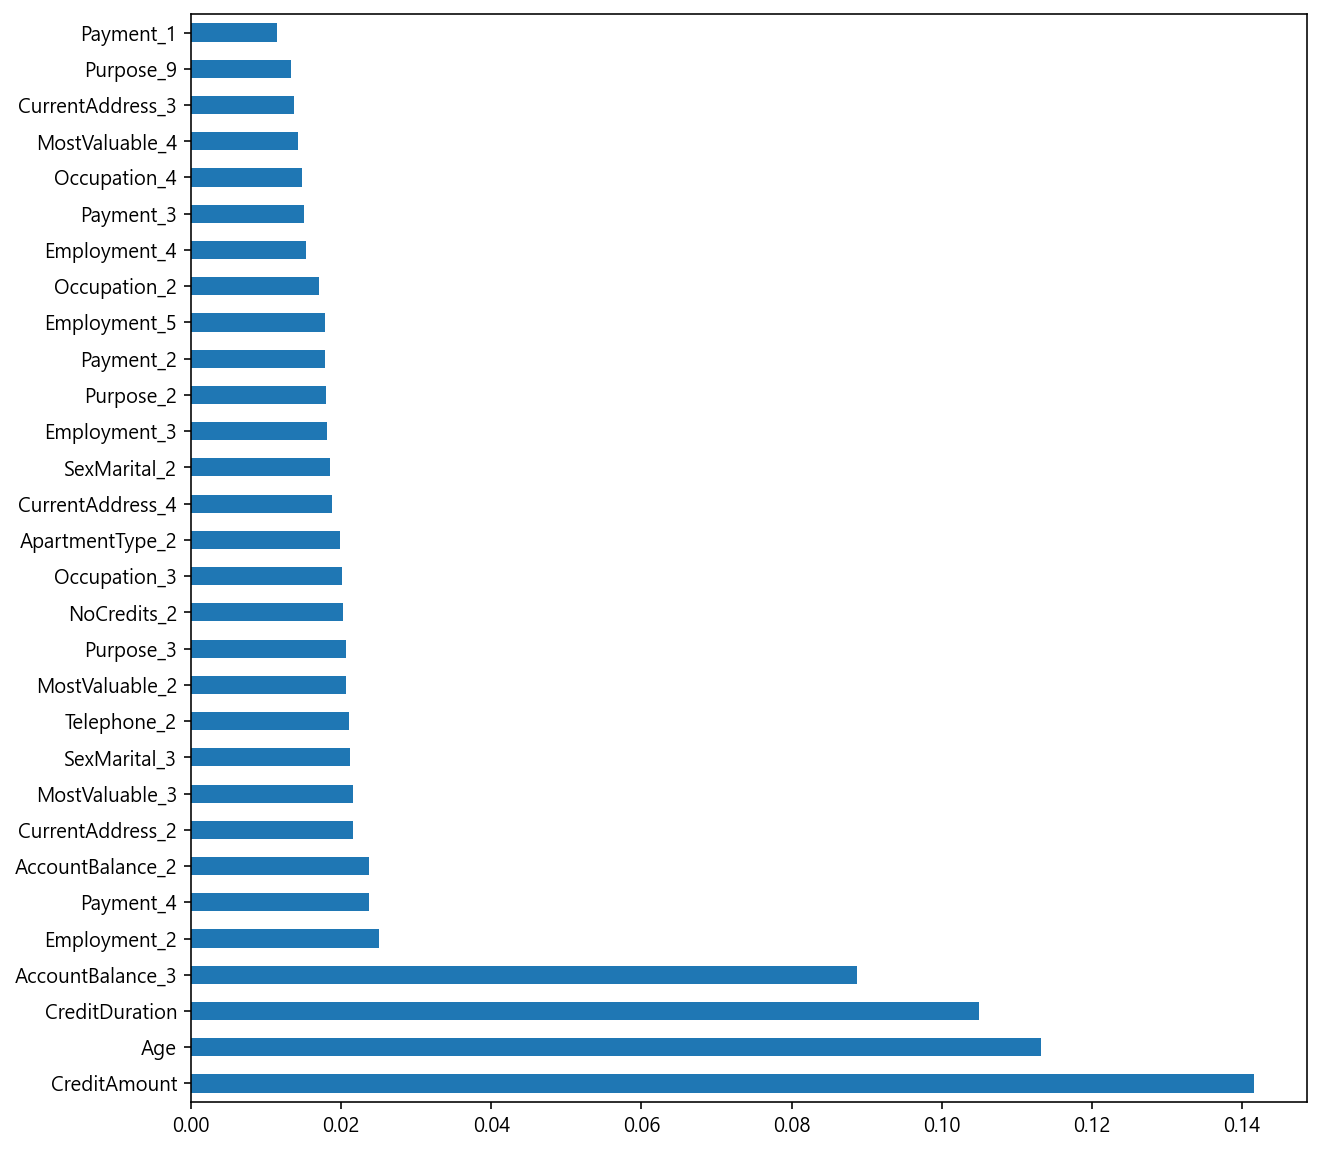

In [743]:
# 중요도 시각화
f_importance = model.feature_importances_ 
f_importance = pd.Series(f_importance, index=x.columns) 
plt.figure(figsize= (5, 8)) 
f_importance = f_importance.nlargest(30) 
f_importance.plot(kind='barh', figsize = (10, 10)) 
plt.rcParams['font.family'] ='Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] =False 
plt.show() 

CreditAmount        0.141571
Age                 0.113166
CreditDuration      0.105012
AccountBalance_3    0.088664
Employment_2        0.024999
dtype: float64


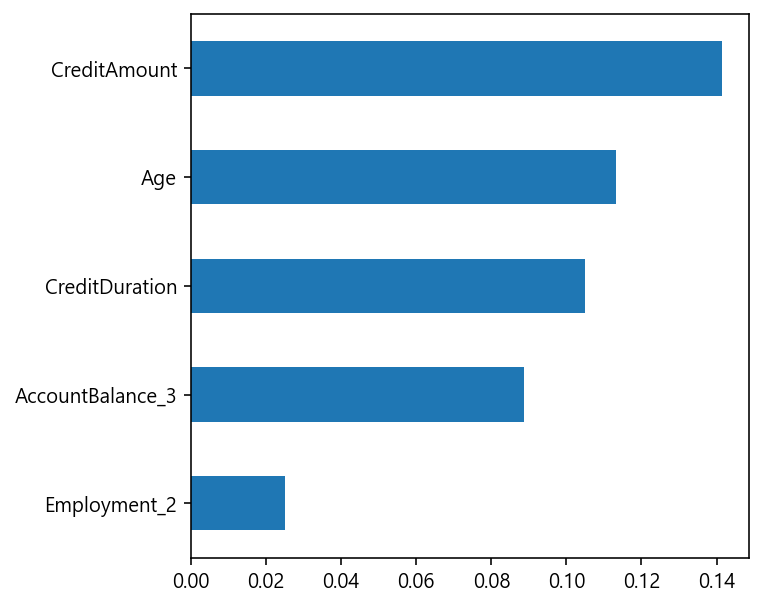

In [744]:
# 중요도 top 5
f_importance = model.feature_importances_
f_importance = pd.Series(f_importance, index=x.columns)
plt.figure(figsize= (5, 8))
f_importance = f_importance.nlargest(5)
print(f_importance)
f_importance.plot(kind='barh', figsize = (5, 5))
plt.gca().invert_yaxis()
plt.show()

- (의견) CreditAmount가 가장 중요도가 높은 것으로 나왔다. 처음 나의 생각과 마찬가지로 대출금액이 클수록 신용도는 떨어지는게 어느정도 맞았다고 생각한다.
- (의견) Payment1은 중요도가 낮은 것으로 나온다.

## 4.5.XGBoost

### 4.5.1.모델링

- XGBoost 알고리즘을 사용해 모델링을 진행합니다.

In [745]:
# 1단계: 불러오기
from xgboost import XGBClassifier

In [746]:
# 2단계: 선언하기
model = XGBClassifier(random_state=2022)

In [747]:
# 3단계: 학습하기
model.fit(x_train,y_train, eval_metric='mlogloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [748]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [749]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 47  50]
 [ 37 166]]
              precision    recall  f1-score   support

           0       0.56      0.48      0.52        97
           1       0.77      0.82      0.79       203

    accuracy                           0.71       300
   macro avg       0.66      0.65      0.66       300
weighted avg       0.70      0.71      0.70       300



- (의견) 71%로 다른 모델링에 비해 그나마 나은 정확도를 보여주고있다.
- (의견) 튜닝으로 다른 파라미터를 추가하게 된다면 성능이 얼마나 증가할지 기대된다.

In [750]:
# 성능 정보 수집
score['XGBoost'] = [precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                    accuracy_score(y_test, y_pred)]

### 4.5.2.모델 탐색(2가지 이상) 

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 혼동행렬 시각화**

- 내용

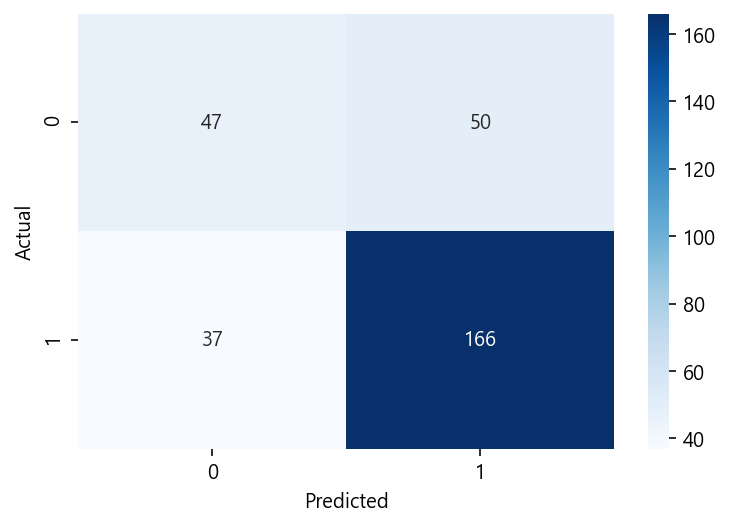

In [751]:
import seaborn as sns
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='.0f',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- (의견) 앞에서 구한 혼동행렬을 시각화 해보았다.

**2) 중요도 확인 및 시각화**

- 내용

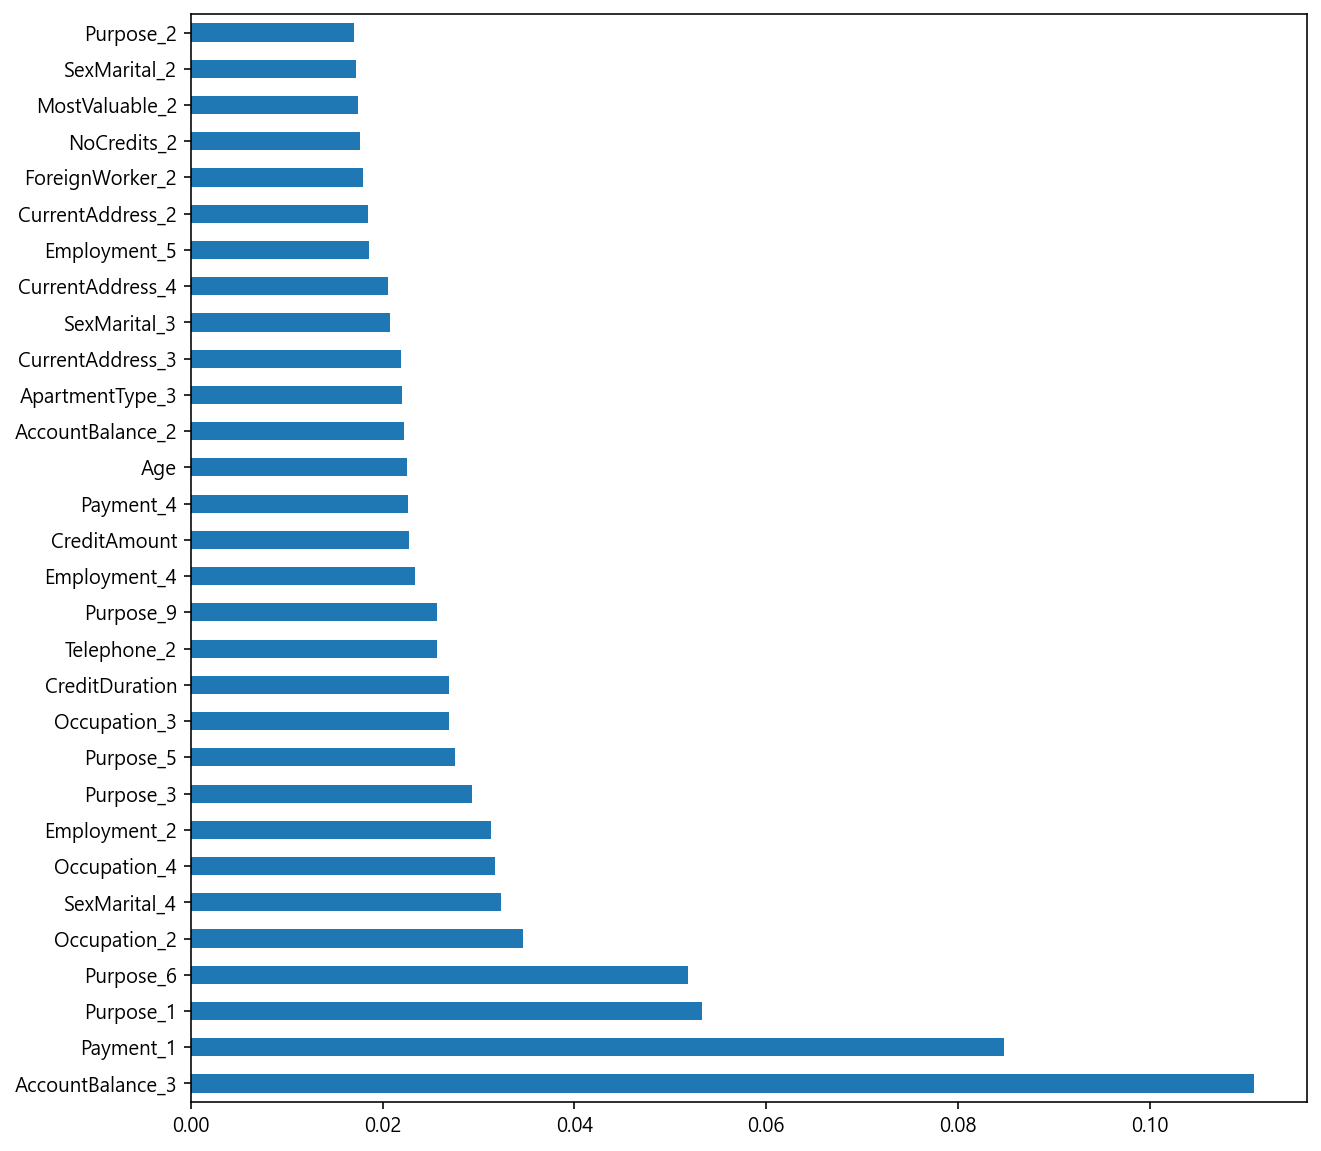

In [752]:
# 중요도 시각화
f_importance = model.feature_importances_ 
f_importance = pd.Series(f_importance, index=x.columns) 
plt.figure(figsize= (5, 8)) 
f_importance = f_importance.nlargest(30) 
f_importance.plot(kind='barh', figsize = (10, 10)) 
plt.rcParams['font.family'] ='Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] =False 
plt.show() 

AccountBalance_3    0.110880
Payment_1           0.084843
Purpose_1           0.053273
Purpose_6           0.051807
Occupation_2        0.034589
dtype: float32


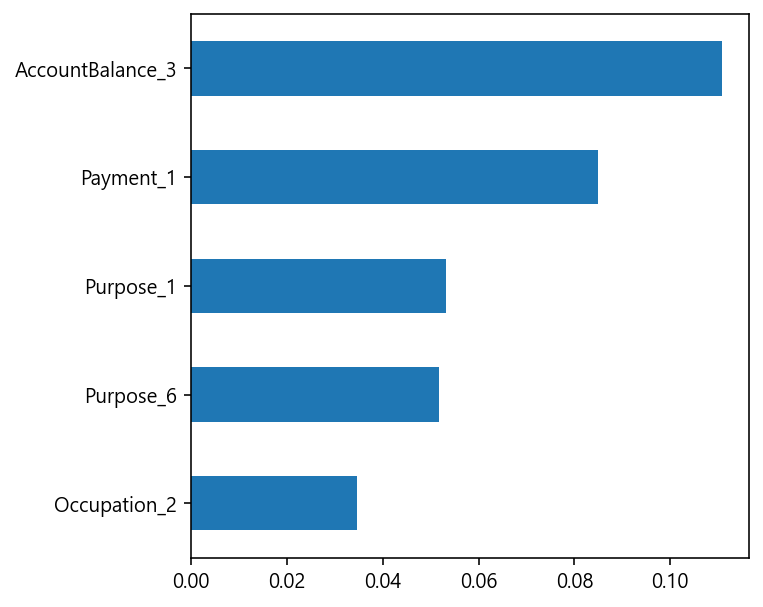

In [753]:
# 중요도 top5
f_importance = model.feature_importances_
f_importance = pd.Series(f_importance, index=x.columns)
plt.figure(figsize= (5, 8))
f_importance = f_importance.nlargest(5)
print(f_importance)
f_importance.plot(kind='barh', figsize = (5, 5))
plt.gca().invert_yaxis()
plt.show()

- (의견) AccountBalance3(균형있는 자산)이 역시 가장 높은 중요도로 보였다.
- (의견) Payment_1(다른 회사 신용)은 Random Forest에서는 중요도가 가장 낮은 것으로 나왔는데 XGBoost에서는 두번쨰로 높게 나온것이 의외이다.

# 5.모델 성능 비교 및 정리

               Precision    Recall  Accuracy
DecisionTree    0.770642  0.827586  0.716667
KNN             0.726891  0.852217  0.683333
LogisticReg     0.785388  0.847291  0.740000
Random Forest   0.762931  0.871921  0.730000
XGBoost         0.768519  0.817734  0.710000


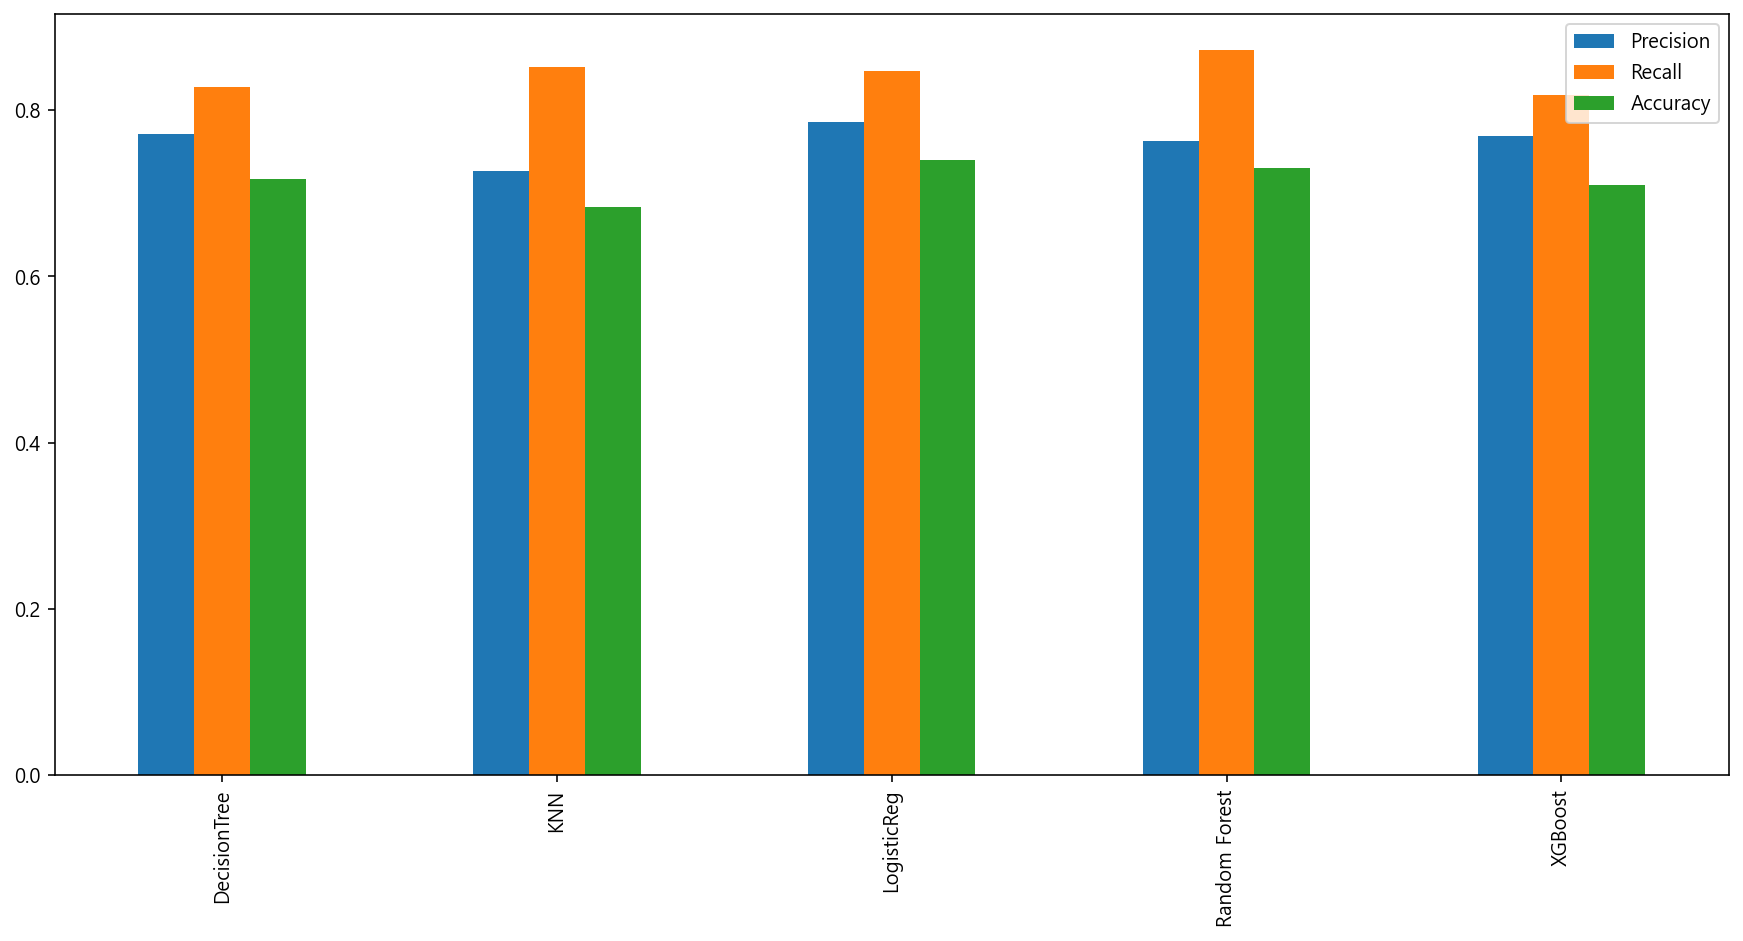

In [754]:
# 성능 정보
tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Precision', 'Recall', 'Accuracy'])
tmp.sort_index(ascending=True, inplace=True)
print(tmp)
tmp.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.show()

- (의견) 로지스틱회귀의 정확도가 74%로 가장 높게 나왔다. 아마도 max_iter=500을 주어서 그렇다고 생각하는데, 그럼 다른 모델링들도 튜닝을 하게 될시 성능이 훨씬 좋아질것이라 예상한다.
- (의견) 0의 재현율과 정밀도는 엄청 낮게 나오는데, 그래프에는 1의 재현율과 정밀도만 나와서 이상적인 수치로 나온것 같다.

# 6.성능 튜닝(1개 이상)

- 특정 알고리즘의 모델을 튜닝 대상으로 정하고 나름의 방법으로 모델 성능을 높여봅니다.

## 6.1. XGBClassifier >>> GridSearchCV튜닝

### 6.1.1.튜닝

In [755]:
# 파라미터 선언
param = {'max_depth' : range(2,24)}
# 불러오기
from sklearn.model_selection import GridSearchCV
# 선언하기
model_xgb = XGBClassifier(random_state=2022)

model = GridSearchCV(model_xgb,
                    param,
                    cv=10,
                    n_jobs=-1,
                    scoring='accuracy')


# 학습하기
model.fit(x_train, y_train)

# 최적의 파라미터
print(model.best_params_)

# 최고의 성능
print(model.best_score_)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[12:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 12}
0.7442857142857143
[[ 50  47]
 [ 37 166]]
              precision    recall  f1-score   support

           0       0.57      0.52      0.54        97
           1       0.78      0.82      0.80       203

    accuracy                           0.72       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.71      0.72      0.72       300



In [756]:
# 성능 정보 수집
score['Grid_XGBoost'] = [precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                    accuracy_score(y_test, y_pred)]

In [757]:
# 중요도 확인
model.best_estimator_.feature_importances_

array([0.02514596, 0.02234146, 0.01804864, 0.02295571, 0.11606841,
       0.136883  , 0.01844708, 0.01816474, 0.01884932, 0.04639084,
       0.01783121, 0.02576612, 0.        , 0.0167533 , 0.04396436,
       0.        , 0.02318666, 0.        , 0.03042052, 0.01572902,
       0.02543402, 0.01629984, 0.01397056, 0.01495827, 0.01312516,
       0.01633874, 0.01655776, 0.01734586, 0.01765641, 0.02380806,
       0.01838954, 0.02042288, 0.02280069, 0.01707765, 0.01905449,
       0.        , 0.02648555, 0.01928776, 0.02328009, 0.02146452,
       0.01929586], dtype=float32)

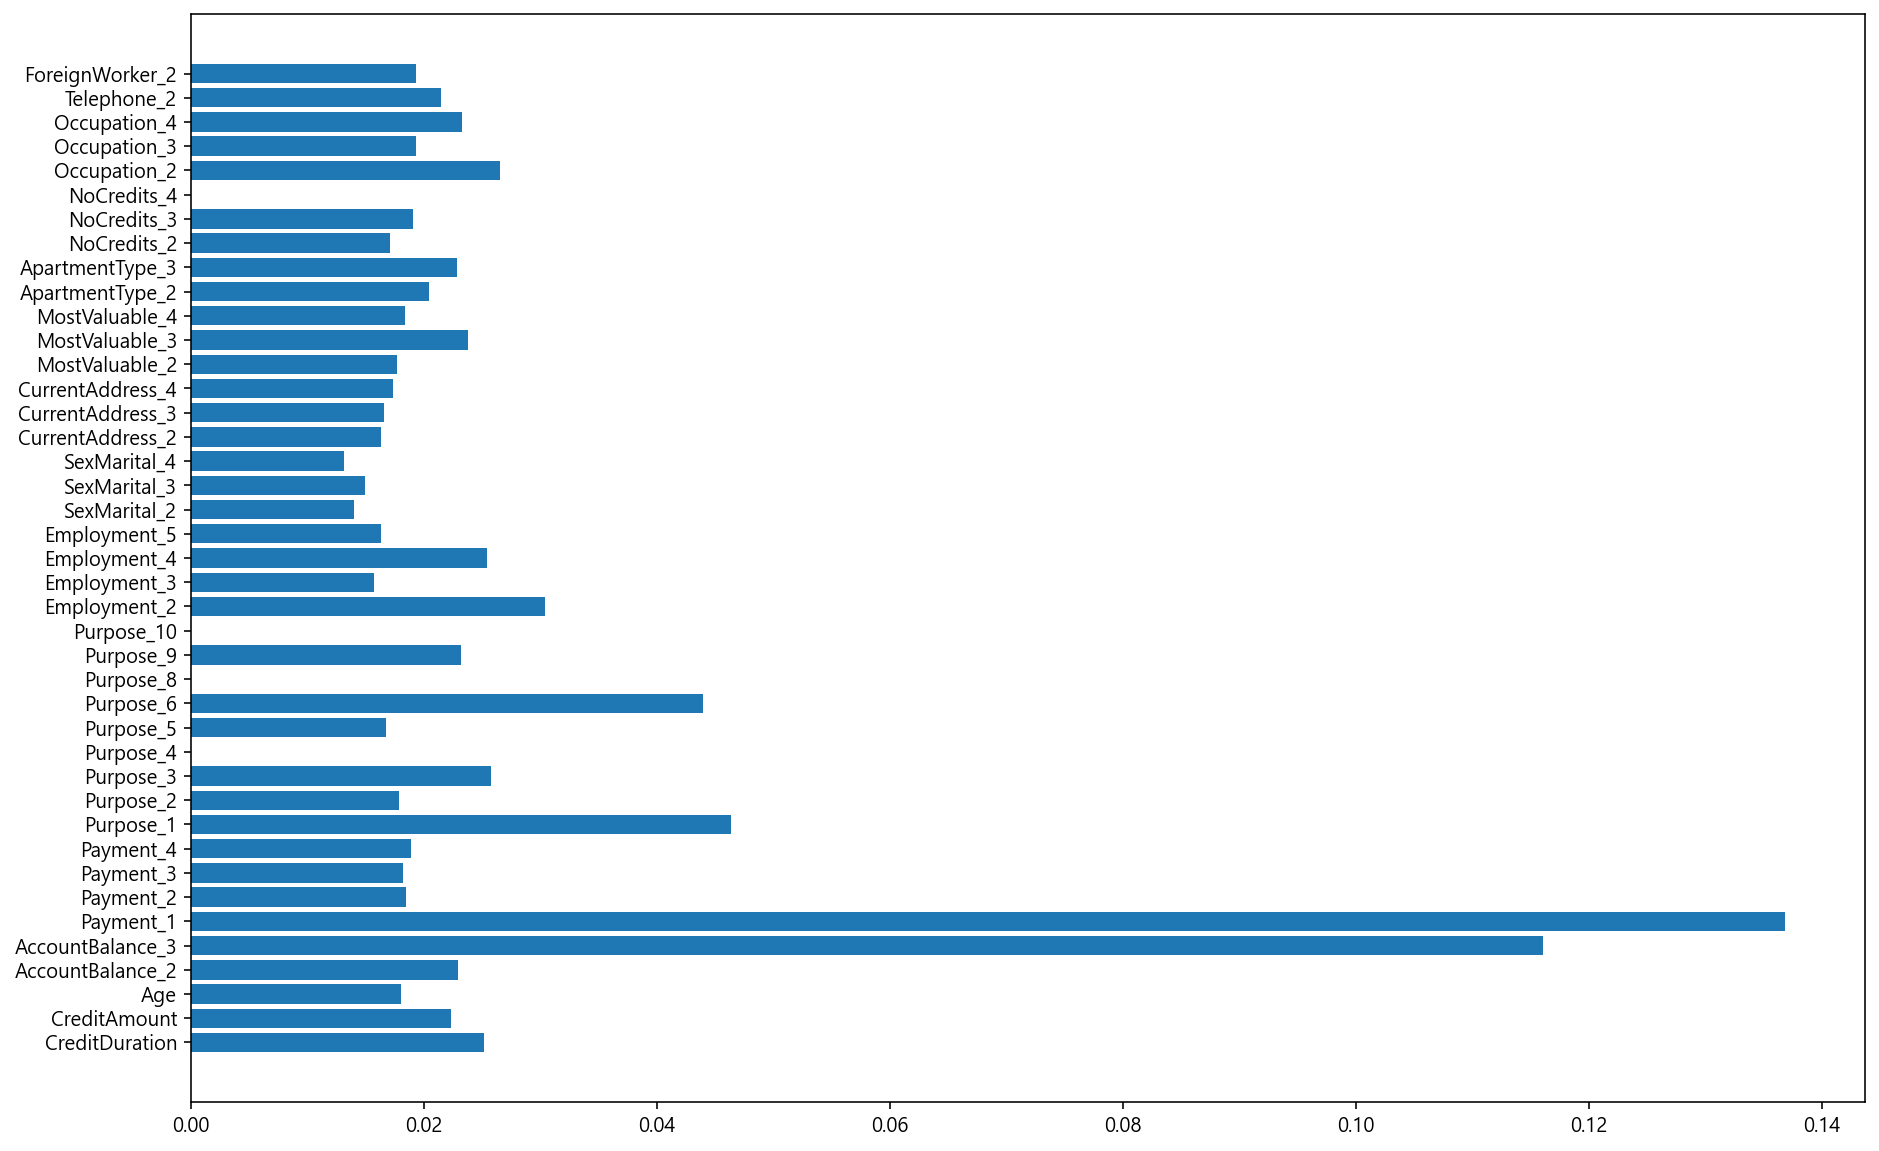

In [758]:
# 중요도 시각화
plt.figure(figsize=(15,10))
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()

Payment_1           0.136883
AccountBalance_3    0.116068
Purpose_1           0.046391
Purpose_6           0.043964
Employment_2        0.030421
dtype: float32


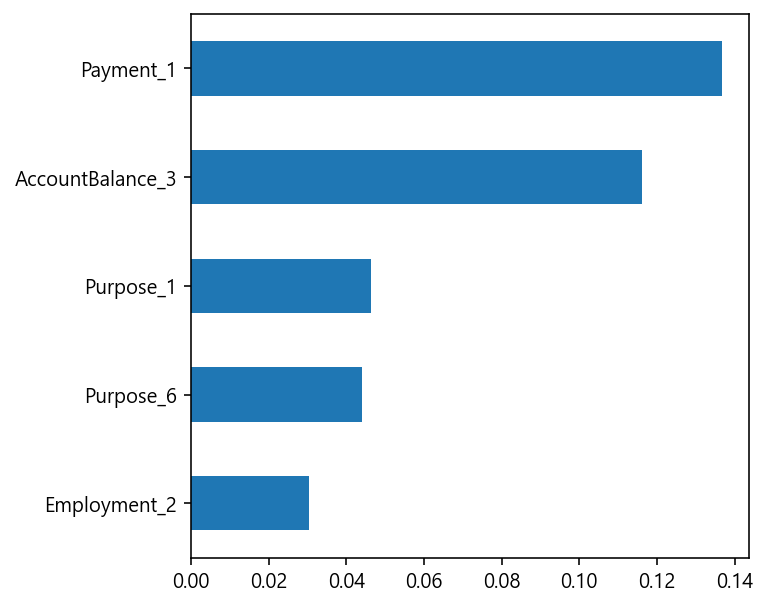

In [759]:
# 중요도 top5
f_importance = model.best_estimator_.feature_importances_
f_importance = pd.Series(f_importance, index=x.columns)
plt.figure(figsize= (5, 8))
f_importance = f_importance.nlargest(5)
print(f_importance)
f_importance.plot(kind='barh', figsize = (5, 5))
plt.gca().invert_yaxis()
plt.show()

### 6.1.2.튜닝 결과

- (의견) 튜닝 결과 1% 정확도가 상승한것으로 보인다.
- (의견) 다른 파라미터를 써서 더 나은 정확도를 찾고 싶었지만, 너무 길어져서 못한게 아쉽다. -
- (의견) 튜닝전과 다르게 Payment_1가 가장 중요도가 높은 것으로 나왔다.
- (의견) 다른 회사 신용도가 중요한것으로 보인다.

## 6.2 RandomForestClassifier >>> GridSearchCV튜닝

### 6.2.1.튜닝

In [760]:
# 파라미터 선언

param = {'max_depth' : range(2,24)}
# 불러오기
from sklearn.model_selection import GridSearchCV
# 선언하기
model_rf = RandomForestClassifier(random_state=2022)

model = GridSearchCV(model_rf,
                    param,
                    cv=10,
                    n_jobs=-1,
                    scoring='accuracy')


# 학습하기
model.fit(x_train, y_train)

# 최적의 파라미터
print(model.best_params_)

# 최고의 성능
print(model.best_score_)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


{'max_depth': 14}
0.7671428571428571
[[ 37  60]
 [ 26 177]]
              precision    recall  f1-score   support

           0       0.59      0.38      0.46        97
           1       0.75      0.87      0.80       203

    accuracy                           0.71       300
   macro avg       0.67      0.63      0.63       300
weighted avg       0.70      0.71      0.69       300



In [761]:
score['Grid_RandomForest'] = [precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                    accuracy_score(y_test, y_pred)]

In [762]:
# 중요도 확인
model.best_estimator_.feature_importances_

array([0.0975274 , 0.14383608, 0.11374669, 0.02242265, 0.08991131,
       0.01427075, 0.01883816, 0.01338097, 0.02392732, 0.0121262 ,
       0.01618164, 0.02082778, 0.00460576, 0.00677822, 0.01093803,
       0.00148433, 0.01387197, 0.00177805, 0.02612825, 0.02117303,
       0.01560591, 0.0149296 , 0.01793689, 0.02245087, 0.01045882,
       0.0214507 , 0.01527036, 0.02017742, 0.01804197, 0.0207695 ,
       0.01436845, 0.02012019, 0.00780853, 0.01946614, 0.00496006,
       0.0022163 , 0.01846311, 0.02076556, 0.0135617 , 0.02305081,
       0.00437252])

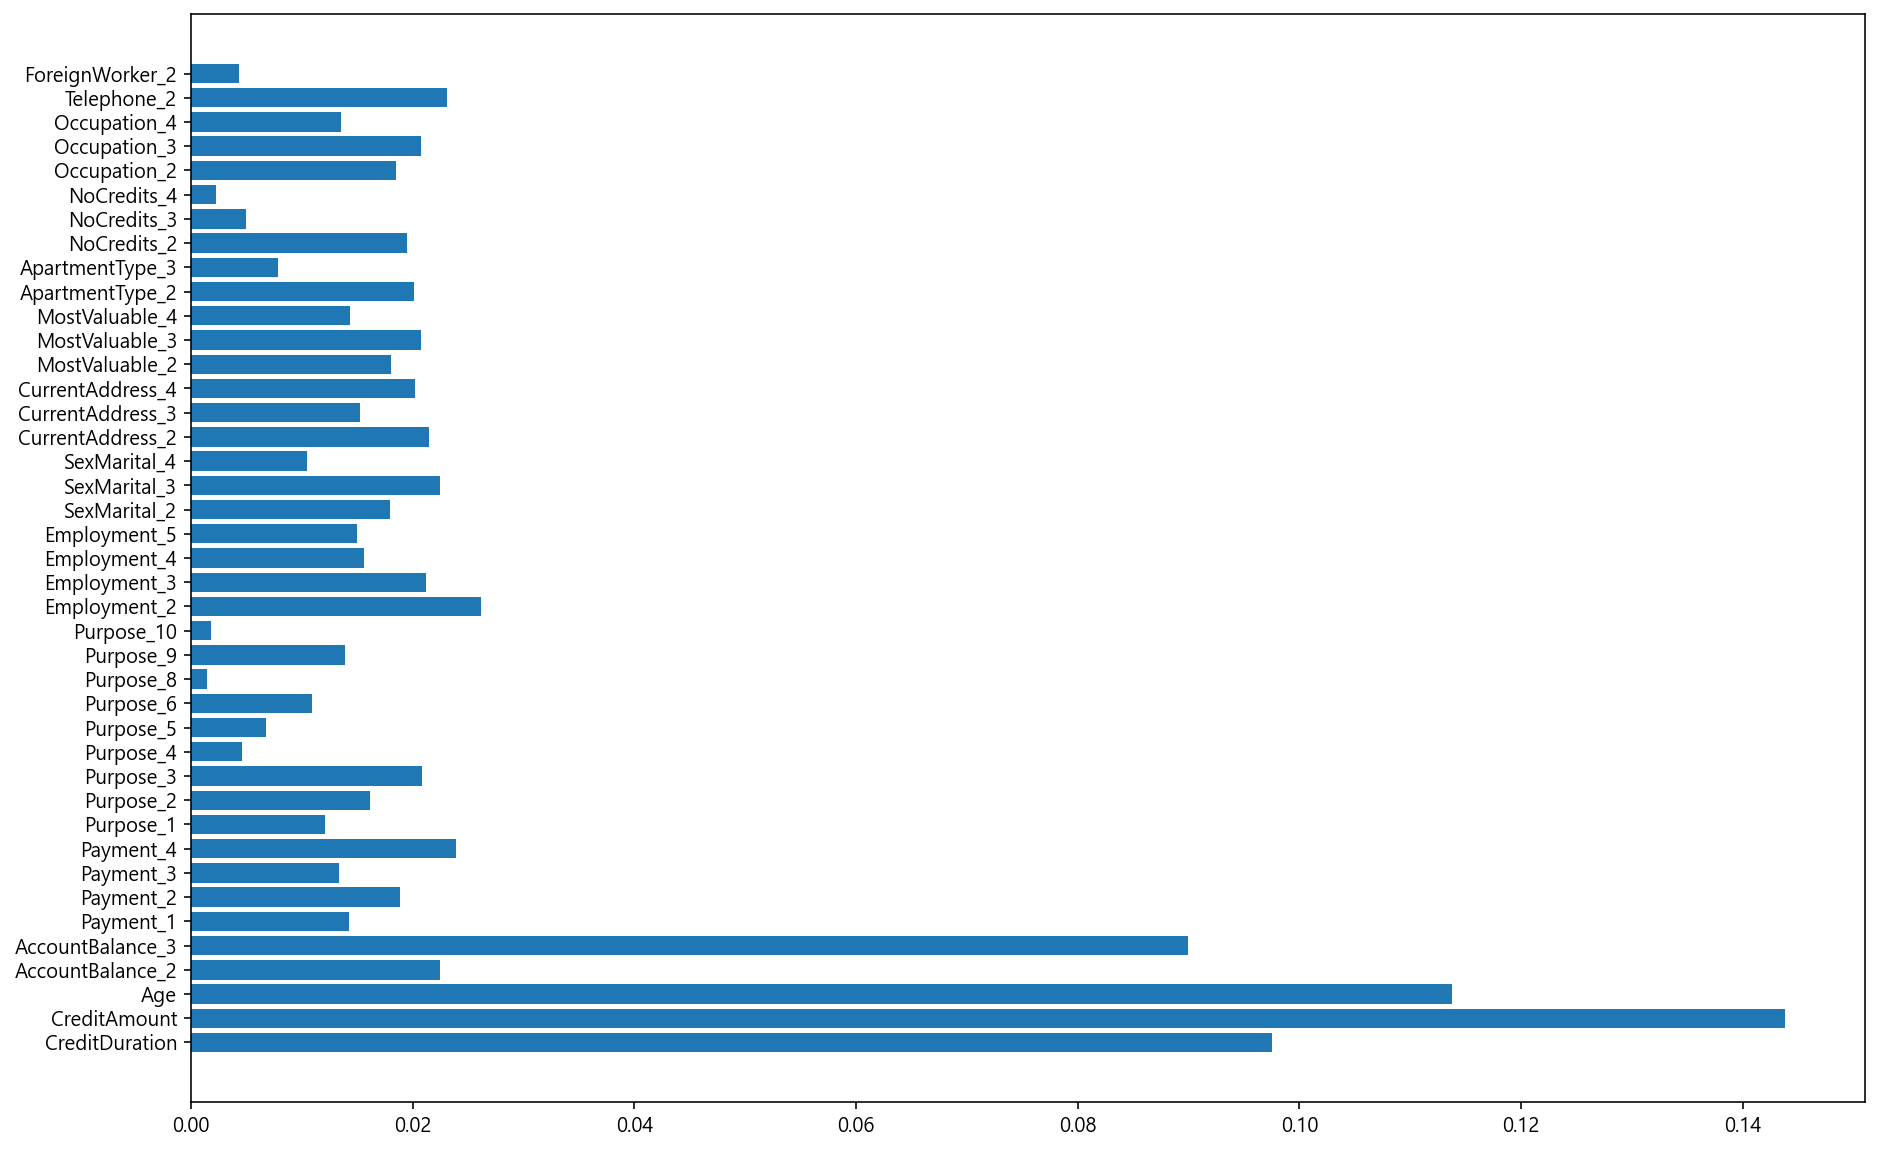

In [763]:
# 중요도 시각화
plt.figure(figsize=(15,10))
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()

CreditAmount        0.143836
Age                 0.113747
CreditDuration      0.097527
AccountBalance_3    0.089911
Employment_2        0.026128
dtype: float64


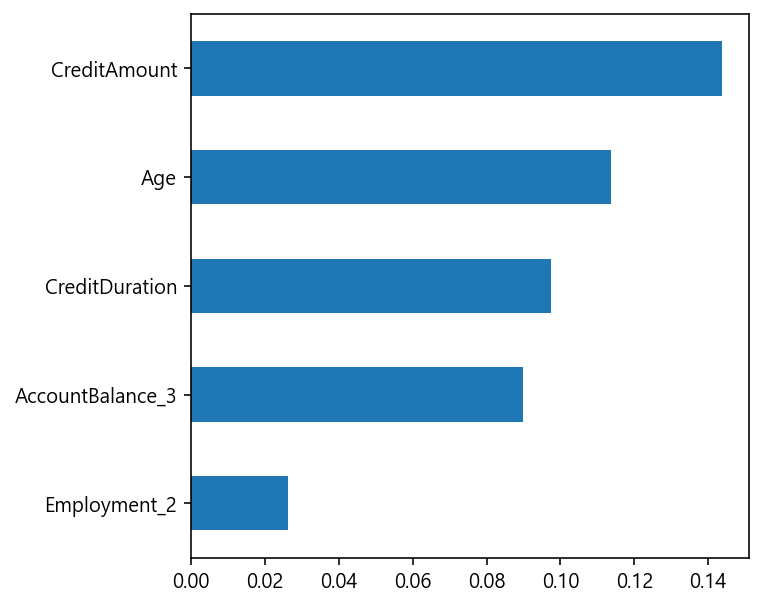

In [764]:
# 중요도 top5
f_importance = model.best_estimator_.feature_importances_
f_importance = pd.Series(f_importance, index=x.columns)
plt.figure(figsize= (5, 8))
f_importance = f_importance.nlargest(5)
print(f_importance)
f_importance.plot(kind='barh', figsize = (5, 5))
plt.gca().invert_yaxis()
plt.show()

### 6.2.2.튜닝 결과

- (의견) 튜닝결과 오히려 2%의 정확도가 성능저하되는것을 볼 수 있다.
- (의견) 시간이 조금 더 많았으면 더 많은 파라미터를 해볼 수 있었는데 아쉬웠다.
- (의견) 튜닝 전후 마찬가지로 CreditAmount의 중요도가 가장 높았다.
- (의견) 신청한 대출기간에 따라 신용도의 중요성이 있는 것 같다.

# 7.종합 정리

                   Precision    Recall  Accuracy
DecisionTree        0.770642  0.827586  0.716667
Grid_RandomForest   0.746835  0.871921  0.713333
Grid_XGBoost        0.779343  0.817734  0.720000
KNN                 0.726891  0.852217  0.683333
LogisticReg         0.785388  0.847291  0.740000
Random Forest       0.762931  0.871921  0.730000
XGBoost             0.768519  0.817734  0.710000


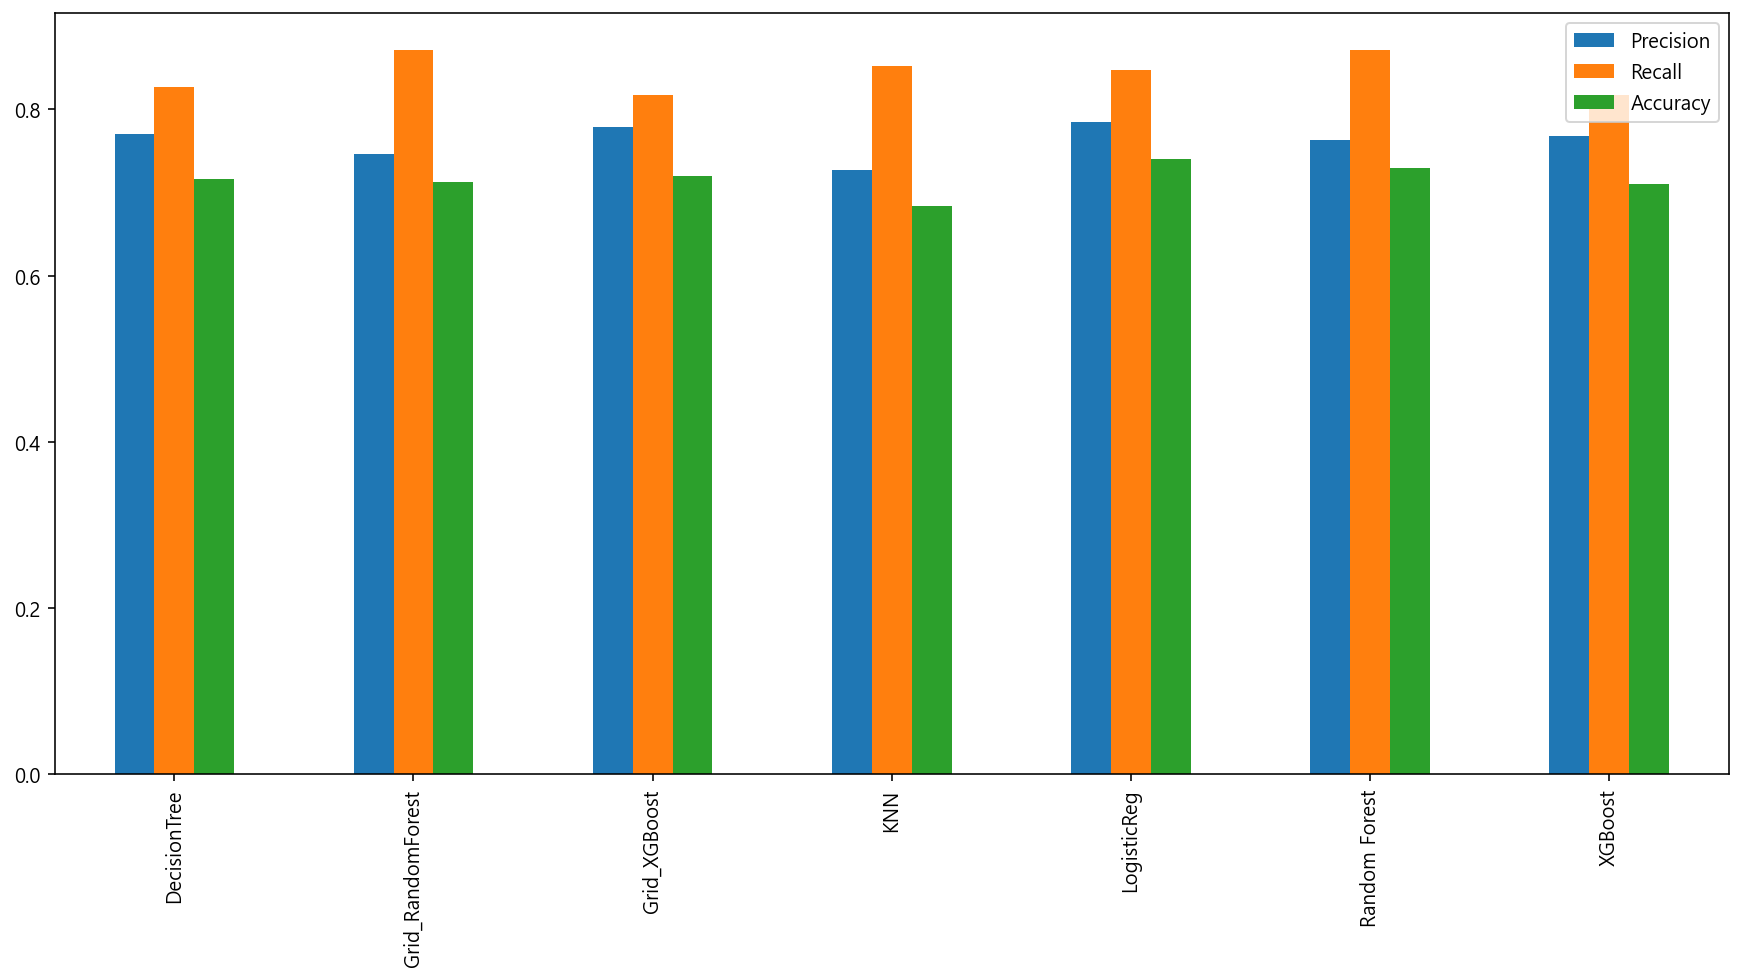

In [765]:
# 최종 성능 정보
tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Precision', 'Recall', 'Accuracy'])
tmp.sort_index(ascending=True, inplace=True)
print(tmp)
tmp.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.show()

- (의견) 많은 튜닝을 하지 못했지만, 그중에 정확도가 가장 좋은 것은 로지스틱회귀로 보인다.
- (의견) 중요도가 대체로 높은 변수들을 보면 AccountBalance_3, CreditAmount, CreditDuration, Age, employment_2 등 있다. 
- (의견) AccountBalance_3(균형있는 자산)은 아무래도 자산이 많으면 은행의 돈을 금방 갚을 확률이 높으니까 그런것 같다.
- (의견) CreditAmount(신청한 대출금)은 아무래도 많을수록 갚아야할 부담이 커져 신용도의 하락에 영향을 끼치는 것 같다.
- (의견) CreditDuration(신청한 대출기간)은 아무래도 길수록 은행에서 받아야할 돈이 길어지니까 신용도의 하락에 영향을 끼치는 것 같다.
- (의견) Age(나이)는 아무래도 돈이 필요한 나이, 창업, 결혼, 내집장만, 전세대출 등 20대 후반에서 40대초반까지의 신용도 변동이 가장커서 영향을 끼치는 것 같다.
- (의견) Employment_2(현직업 근무기간 1년 미만)은 아무래도 막 취준생을 벗어나서 갚아야될 학자금 대출 등 각종 대출들을 갚아가면서 신용도 변동이 큰것같다.
- (의견) XGBoost의 중요도로 보면 Purpose_1(새 차), Occupation_2(사무 정규직)의 중요도도 높게 나왔는데, 이유가 뭔지 궁금하다.